# L5 pyccd

## Objectives

1. refine indexing of data for usard into datacube
2. test pyccd on longer image chain - more observations
3. look at using a real thermal band for l5
4. determine if any change_probability values are non-zero

In [1]:
# imports

from noteLib import *

In [2]:
# select the data

In [3]:
h = 3
v = 3
ch = 19
cv = 18
m1 = display_tile_chip(h, v, ch, cv)


In [4]:
# m1

In [5]:
import datacube
dc= datacube.Datacube()

dc.list_products()

,name,description,instrument,format,lon,platform,product_type,lat,time,crs,resolution,tile_size,spatial_dimensions
id,,,,,,,,,,,,,
13,landsat_5_USARD,Landsat 5 US/ARD Product Definition,TM,GeoTiff,None,LANDSAT_5,USARD,None,None,NaN,NaN,NaN,NaN
14,landsat_7_USARD,Landsat 7 US/ARD Product Definition,ETM,GeoTiff,None,LANDSAT_7,USARD,None,None,NaN,NaN,NaN,NaN
15,landsat_8_USARD,Landsat 8 US/ARD Product Definition,OLI_TIRS,GeoTiff,None,LANDSAT_8,USARD,None,None,NaN,NaN,NaN,NaN


In [6]:
dc.list_measurements()

aliases  dtype  \
product         measurement                                         
landsat_5_USARD blue                        [band_1, blue]  int16   
                green                      [band_2, green]  int16   
                red                          [band_3, red]  int16   
                nir                          [band_4, nir]  int16   
                swir1                      [band_5, swir1]  int16   
                therm                      [band_6, therm]  int16   
                swir2                      [band_7, swir2]  int16   
                pixel_qa               [PIXELQA, pixel_qa]  int16   
landsat_7_USARD blue                        [band_1, blue]  int16   
                green                      [band_2, green]  int16   
                red                          [band_3, red]  int16   
                nir                          [band_4, nir]  int16   
                swir1                      [band_5, swir1]  int16   
                therm                      [band_6, therm]  int16   
                swir2                      [band_7, swir2]  int16   
                pixel_qa               [PIXELQA, pixel_qa]  int16   
landsat_8_USARD coastal_aerosol  [band_1, coastal_aerosol]  int16   
                blue                        [band_2, blue]  int16   
                green                      [band_3, green]  int16   
                red                          [band_4, red]  int16   
                nir                          [band_5, nir]  int16   
                swir1                      [band_6, swir1]  int16   
                swir2                      [band_7, swir2]  int16   
                panchromatic        [band_8, panchromatic]  int16   
                cirrus                    [band_9, cirrus]  int16   
                lwir1                     [band_10, lwir1]  int16   
                lwir2                     [band_11, lwir2]  int16   
                pixel_qa               [PIXELQA, pixel_qa]  int16   

                                                                  flags_definition  \
product         measurement                                                          
landsat_5_USARD blue                                                           NaN   
                green                                                          NaN   
                red                                                            NaN   
                nir                                                            NaN   
                swir1                                                          NaN   
                therm                                                          NaN   
                swir2                                                          NaN   
                pixel_qa         {'terrain_occlusion': {'description': 'Terrain...   
landsat_7_USARD blue                                                           NaN   
                green                                                          NaN   
                red                                                            NaN   
                nir                                                            NaN   
                swir1                                                          NaN   
                therm                                                          NaN   
                swir2                                                          NaN   
                pixel_qa         {'terrain_occlusion': {'description': 'Terrain...   
landsat_8_USARD coastal_aerosol                                                NaN   
                blue                                                           NaN   
                green                                                          NaN   
                red                                                            NaN   
                nir                                                            NaN   
  

# Filterings

play with threshold and fill and daterange

number of observations can range from 30 to 1000

## Ask Jeff Briden what is the right strategy - should we look at any filtering observations

In [7]:
from datetime import datetime

date_range = (
        datetime(1980,1,1),
        # datetime(2017,1,1),
        datetime(2018,9,30))

clear_list = dc_find_datasets(date_range=date_range, product='landsat_5_USARD', cloud_threshold = 40, fill_threshold = 40)




h=3
v=3
ch=19
vh=18



Number of Pretty Scenes 184


In [8]:
Start = time.time()

In [9]:
measurements = ['red', 'green', 'blue', 'nir', 'swir1', 'swir2', 'pixel_qa']

dc_xarray = dc_load_tile_chip(h,v,ch,cv,datasets=clear_list,measurements=measurements)

dc_xarray



<xarray.Dataset>
Dimensions:   (time: 184, x: 100, y: 100)
Coordinates:
  * time      (time) datetime64[ns] 1984-06-01T18:24:06.365006 ... 2011-10-18T18:44:02.856025
  * y         (y) float64 2.811e+06 2.811e+06 2.811e+06 ... 2.808e+06 2.808e+06
  * x         (x) float64 -2.059e+06 -2.059e+06 ... -2.056e+06 -2.056e+06
Data variables:
    red       (time, y, x) int16 603 571 541 541 541 ... 829 972 1020 925 877
    green     (time, y, x) int16 777 742 742 742 705 ... 778 959 1079 899 778
    blue      (time, y, x) int16 444 444 444 427 410 444 ... 688 806 954 718 718
    nir       (time, y, x) int16 4271 4271 4376 4271 4236 ... 1127 1183 1071 959
    swir1     (time, y, x) int16 1871 1846 1773 1725 1725 ... 1006 1006 1006 930
    swir2     (time, y, x) int16 876 842 808 774 842 ... 1008 1062 1008 1062 846
    pixel_qa  (time, y, x) int16 66 66 66 66 66 66 66 ... 66 66 68 66 66 66 68
Attributes:
    crs:      epsg:5072

In [10]:
End = time.time()
print ("Load time took seconds = ", End-Start)

Load time took seconds =  329.3718149662018


In [11]:
qa_cnt = {}
ary = dc_xarray['pixel_qa'][6].values
for x in range(0,100):
    for y in range (0,100):
        if ary[x,y] in qa_cnt.keys():
            qa_cnt[ary[x,y]] = qa_cnt[ary[x,y]] + 1
        else:
            qa_cnt[ary[x,y]] = 1
    print
    
for i in sorted(qa_cnt):
    print(i, qa_cnt[i])

66 7406
68 2553
80 31
130 8
132 2


In [12]:
def name_that_qa(pixel):

    qa_dict = { 66: 'Clear terrain, low-confidence cloud, low-confidence cirrus',
                68: 'Water, low-confidence cloud, low-confidence cirrus',
                72: 'Cloud shadow, low-confidence cloud, low-confidence cirrus',
                80: 'Snow/ice, low-confidence cloud, low-confidence cirrus',
                96: 'Cloud, low-confidence cloud, low-confidence cirrus',
                130: 'Cloud, medium-confidence cloud, low-confidence cirrus',
                132: 'Cloud, high-confidence cloud, low-confidence cirrus',
               
              }
    
    return qa_dict[pixel]

In [13]:
for i in sorted(qa_cnt):
    print(i, qa_cnt[i], name_that_qa(i))
    
print ('__' * 60)
num_pixels = 100 * 100
for i in sorted(qa_cnt):
    pct = qa_cnt[i]/num_pixels * 100
    print(i, "%02d" % pct, '% -',name_that_qa(i))
print ('__' * 60)


66 7406 Clear terrain, low-confidence cloud, low-confidence cirrus
68 2553 Water, low-confidence cloud, low-confidence cirrus
80 31 Snow/ice, low-confidence cloud, low-confidence cirrus
130 8 Cloud, medium-confidence cloud, low-confidence cirrus
132 2 Cloud, high-confidence cloud, low-confidence cirrus
________________________________________________________________________________________________________________________
66 74 % - Clear terrain, low-confidence cloud, low-confidence cirrus
68 25 % - Water, low-confidence cloud, low-confidence cirrus
80 00 % - Snow/ice, low-confidence cloud, low-confidence cirrus
130 00 % - Cloud, medium-confidence cloud, low-confidence cirrus
132 00 % - Cloud, high-confidence cloud, low-confidence cirrus
________________________________________________________________________________________________________________________


In [14]:
ary = dc_xarray['pixel_qa'][0].values/1000
for x in range(0,100):
    for y in range (0,100):
        print (ary[x,y],' ', end='')
    print

0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.068  0.068  0.068  0.068  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066 

0.068  0.068  0.068  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.068  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.068  0.068  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066 

0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.068  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066 

 0.066  0.066  0.066  0.066  0.066  0.068  0.068  0.068  0.068  0.068  0.068  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.068  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.068  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066

  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.068  0.068  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.06

0.066  0.066  0.068  0.068  0.068  0.068  0.068  0.066  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.068  0.068  0.068  0.066  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068 

0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.068  0.068  0.068  0.068  0.068  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.068  0.066  0.066  0.066  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066 

 0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.066  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068  0.068

(100, 100)


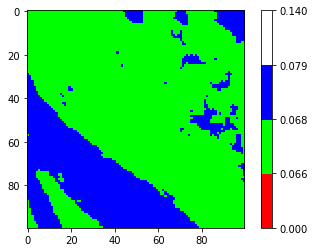

In [15]:
import matplotlib
from matplotlib import pyplot

# this could be in the nb_image.py file - plot_ccd_prob
w_cmap = matplotlib.colors.ListedColormap(['#ff0000','#00ff00','#0000ff' , 'white'])
w_bounds = [0,0.066,0.068,0.079, 0.140]
w_norm = matplotlib.colors.BoundaryNorm(w_bounds,w_cmap.N)



print(ary.shape)

pyplot.imshow(ary, cmap=w_cmap, norm = w_norm)
pyplot.colorbar()
pyplot.show()

In [16]:
import ccd
import pandas as pd
import numpy as np
from datetime import datetime


def local_get_color_params(ds, inx, iny):

    landsat_dataset = ds
    myx = inx
    myy = iny

    myred = landsat_dataset.red[:, myy, myx].values

    myblue = landsat_dataset.blue[:, myy, myx].values

    mygreen = landsat_dataset.green[:, myy, myx].values
    mynir = landsat_dataset.nir[:, myy, myx].values
    myswir1 = landsat_dataset.swir1[:, myy, myx].values
    myswir2 = landsat_dataset.swir2[:, myy, myx].values
    mypixel_qa = landsat_dataset.pixel_qa[:, myy, myx].values
    #print(mypixel_qa)
    mypixel_qa[mypixel_qa < 1] = 1
    #print(mypixel_qa)

    dts = landsat_dataset.time.values
    scene_count = len(dts)
    mythermals = np.ones(scene_count) * (273.15) * 10

    ordinal_dates = []
    for mydate in dts:
        dval = datetime.utcfromtimestamp(mydate.tolist()/1e9)
        ordinal_dates.append(dval.toordinal())


    params = (ordinal_dates, myblue, mygreen, myred, mynir, myswir1, myswir2, mythermals, mypixel_qa)

    mystery_object = ccd.detect(*params)

    return mystery_object


In [17]:
from datetime import datetime

from noteLib import *

import numpy
import logging
import xarray as xr

def _return_change_array(the_xarray):
    width = 100
    height = 100
    change_array = numpy.zeros(shape = (width, height))
    water_array = numpy.zeros(shape = (width,height))
    snow_array = numpy.zeros(shape = (width,height))
    cloud_array = numpy.zeros(shape = (width,height))
    two_d_model = {}
    

    for x in range(0,width):
        for y in range(0,height):
            mo = local_get_color_params(the_xarray,y,x) # (note the y,x for numpy array filling axis sanity
            #print(mo)
            # save subelement numpy simple 2D arrays for later attachment to an xarray
            water_array[x,y] = mo['water_prob']
            snow_array[x,y] = mo['snow_prob']
            cloud_array[x,y] = mo['cloud_prob']
            
            # Store the full model as a 2D array of dict(s)
            two_d_model[x] = two_d_model.get(x, {})
            two_d_model[x][y] = mo
           
            for mod in mo['change_models']:
                change_array[x,y] = mod['change_probability']
                
                prob = change_array[x,y]
                if (prob > 0):
                    print(x,y,"change_prob",change_array[x,y])
                    #logging.info("prob = %f" % prob)
                else:
                    print(x,y,"change_prob",change_array[x,y])
            if (len(mo['change_models']) < 1):
                print(x,y,"No Change Models - need more samples?")
        print("...")
        
    # build a cool xarray to be saved
    mo_ds = xr.Dataset({'change': (('x','y'), change_array),
                          'water': (('x','y'), water_array),
                          'snow': (('x','y'), snow_array),
                          'cloud': (('x','y'), cloud_array),

                       })
    print(mo_ds)
    
    for x in range(0,width):
        for y in range(0,height):
            read_model = two_d_model[x][y]
            print(read_model['water_prob'])
            
    return mo_ds, two_d_model



In [18]:
Start = time.time()

In [19]:
mo_xarray, mo_2D_dict_array = _return_change_array(the_xarray=dc_xarray)

0 0 change_prob 0.0
0 1 change_prob 0.0
0 2 change_prob 0.0
0 3 change_prob 0.0
0 4 change_prob 0.0
0 5 change_prob 0.0
0 6 change_prob 0.0
0 7 change_prob 0.0
0 8 change_prob 0.0
0 9 change_prob 0.0
0 10 change_prob 0.0
0 11 change_prob 0.0
0 12 change_prob 0.0
0 13 change_prob 0.0
0 14 change_prob 0.0
0 15 change_prob 0.0
0 16 change_prob 0.0
0 17 change_prob 0.0
0 18 change_prob 0.0
0 19 change_prob 0.0
0 20 change_prob 0.0
0 21 change_prob 0.0
0 22 change_prob 0.0
0 23 change_prob 0.0
0 24 change_prob 0.0
0 25 change_prob 0.0
0 26 change_prob 0.0
0 27 change_prob 0.0
0 28 change_prob 0.0
0 29 change_prob 0.0
0 30 change_prob 0.0
0 31 change_prob 0.0
0 32 change_prob 0.0
0 33 change_prob 0.0
0 34 change_prob 0.0
0 35 change_prob 0.0
0 36 change_prob 1.0
0 36 change_prob 0.0
0 37 change_prob 0.0
0 38 change_prob 0.0
0 39 change_prob 0.0
0 40 change_prob 0.0
0 41 change_prob 0.0
0 42 change_prob 0.0
0 43 change_prob 0.0
0 44 change_prob 0.0
0 45 change_prob 0.0
0 46 change_prob 0.0
0 

3 75 change_prob 0.0
3 76 change_prob 0.0
3 76 change_prob 0.0
3 77 change_prob 0.0
3 78 change_prob 0.0
3 79 change_prob 0.0
3 80 change_prob 0.0
3 81 change_prob 0.0
3 82 change_prob 0.0
3 83 change_prob 0.0
3 84 change_prob 0.0
3 85 change_prob 0.0
3 86 change_prob 0.0
3 87 change_prob 0.0
3 88 change_prob 0.0
3 89 change_prob 0.0
3 90 change_prob 0.0
3 91 change_prob 0.0
3 92 change_prob 0.0
3 93 change_prob 0.0
3 94 change_prob 0.0
3 95 change_prob 0.0
3 96 change_prob 0.0
3 97 change_prob 0.0
3 98 change_prob 0.0
3 99 change_prob 0.0
...
4 0 change_prob 0.0
4 1 change_prob 0.0
4 2 change_prob 0.0
4 3 change_prob 0.0
4 4 change_prob 0.0
4 5 change_prob 0.0
4 6 change_prob 0.0
4 7 change_prob 0.0
4 8 change_prob 0.0
4 9 change_prob 0.0
4 10 change_prob 0.0
4 11 change_prob 0.0
4 12 change_prob 0.0
4 13 change_prob 0.0
4 14 change_prob 0.0
4 15 change_prob 0.0
4 16 change_prob 0.0
4 17 change_prob 0.0
4 18 change_prob 0.0
4 19 change_prob 0.0
4 20 change_prob 0.0
4 21 change_prob 0.

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


4 40 change_prob 0.0
4 41 change_prob 0.0
4 42 change_prob 0.0
4 43 change_prob 0.0
4 44 change_prob 0.0
4 45 change_prob 0.0
4 46 change_prob 0.0
4 47 change_prob 0.0
4 48 change_prob 0.0
4 49 change_prob 0.0
4 50 change_prob 0.0
4 51 change_prob 0.0
4 52 change_prob 0.0
4 53 change_prob 0.0
4 54 change_prob 0.0
4 55 change_prob 0.0
4 56 change_prob 0.0
4 57 change_prob 0.0
4 58 change_prob 0.0
4 59 change_prob 0.0
4 60 change_prob 0.0
4 61 change_prob 0.0
4 62 change_prob 0.0
4 63 change_prob 0.0
4 64 change_prob 0.0
4 65 change_prob 0.0
4 66 change_prob 0.0
4 67 change_prob 1.0
4 67 change_prob 0.0
4 68 change_prob 1.0
4 68 change_prob 0.0
4 69 change_prob 0.0
4 70 change_prob 0.0
4 71 change_prob 0.0
4 72 change_prob 0.0
4 73 change_prob 0.0
4 74 change_prob 1.0
4 74 change_prob 0.0
4 75 change_prob 0.0
4 76 change_prob 0.0
4 77 change_prob 0.0
4 78 change_prob 0.0
4 79 change_prob 0.0
4 80 change_prob 0.0
4 81 change_prob 0.0
4 82 change_prob 0.0
4 83 change_prob 0.0
4 84 change_p

8 8 change_prob 0.0
8 9 change_prob 0.0
8 10 change_prob 0.0
8 11 change_prob 0.0
8 12 change_prob 0.0
8 13 change_prob 0.0
8 14 change_prob 0.0
8 15 change_prob 0.0
8 16 change_prob 0.0
8 17 change_prob 0.0
8 18 change_prob 0.0
8 19 change_prob 0.0
8 20 change_prob 0.0
8 21 change_prob 0.0
8 22 change_prob 0.0
8 23 change_prob 0.0
8 24 change_prob 0.0
8 25 change_prob 0.0
8 26 change_prob 0.0
8 27 change_prob 0.0
8 28 change_prob 0.0
8 29 change_prob 0.0
8 30 change_prob 0.0
8 31 change_prob 0.0
8 32 change_prob 0.0
8 33 change_prob 0.0
8 34 change_prob 1.0
8 34 change_prob 0.0
8 35 change_prob 1.0
8 35 change_prob 1.0
8 35 change_prob 0.0
8 36 change_prob 0.0
8 37 change_prob 0.0
8 38 change_prob 0.0
8 39 change_prob 0.0
8 40 change_prob 0.0
8 41 change_prob 0.0
8 42 change_prob 0.0
8 43 change_prob 0.0
8 44 change_prob 0.0
8 45 change_prob 0.0
8 46 change_prob 0.0
8 47 change_prob 0.0
8 48 change_prob 0.0
8 49 change_prob 0.0
8 50 change_prob 0.0
8 51 change_prob 0.0
8 52 change_pro

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


9 50 change_prob 0.0
9 51 change_prob 0.0
9 52 change_prob 0.0
9 53 change_prob 0.0
9 54 change_prob 0.0
9 55 change_prob 0.0
9 56 change_prob 0.0
9 57 change_prob 0.0
9 58 change_prob 0.0
9 59 change_prob 0.0
9 60 change_prob 0.0
9 61 change_prob 0.0
9 62 change_prob 0.0
9 63 change_prob 0.0
9 64 change_prob 0.0
9 65 change_prob 0.0
9 66 change_prob 0.0
9 67 change_prob 0.0
9 68 change_prob 0.0
9 69 change_prob 0.0
9 70 change_prob 0.0
9 71 change_prob 1.0
9 71 change_prob 0.0
9 72 change_prob 0.0
9 73 change_prob 0.0
9 74 change_prob 0.0
9 75 change_prob 0.0
9 76 change_prob 0.0
9 77 change_prob 0.0
9 78 change_prob 0.0
9 79 change_prob 0.0
9 80 change_prob 0.0
9 81 change_prob 0.0
9 82 change_prob 0.0
9 83 change_prob 0.0
9 84 change_prob 0.0
9 85 change_prob 0.0
9 86 change_prob 0.0
9 87 change_prob 0.0
9 88 change_prob 0.0
9 89 change_prob 1.0
9 89 change_prob 0.0
9 90 change_prob 1.0
9 90 change_prob 1.0
9 90 change_prob 0.0
9 91 change_prob 1.0
9 91 change_prob 1.0
9 91 change_p

13 10 change_prob 0.0
13 11 change_prob 0.0
13 12 change_prob 0.0
13 13 change_prob 0.0
13 14 change_prob 0.0
13 15 change_prob 0.0
13 16 change_prob 0.0
13 17 change_prob 0.0
13 18 change_prob 0.0
13 19 change_prob 0.0
13 20 change_prob 0.0
13 21 change_prob 0.0
13 22 change_prob 0.0
13 23 change_prob 0.0
13 24 change_prob 0.0
13 25 change_prob 0.0
13 26 change_prob 0.0
13 27 change_prob 0.0
13 28 change_prob 0.0
13 29 change_prob 0.0
13 30 change_prob 0.0
13 31 change_prob 0.0
13 32 change_prob 0.0
13 33 change_prob 0.0
13 34 change_prob 0.0
13 35 change_prob 0.0
13 36 change_prob 0.0
13 37 change_prob 0.0
13 38 change_prob 0.0
13 39 change_prob 0.0
13 39 change_prob 1.0
13 39 change_prob 0.0
13 40 change_prob 0.0
13 41 change_prob 0.0
13 42 change_prob 0.0
13 43 change_prob 0.0
13 44 change_prob 1.0
13 44 change_prob 0.0
13 45 change_prob 0.0
13 46 change_prob 0.0
13 47 change_prob 0.0
13 48 change_prob 0.0
13 49 change_prob 0.0
13 50 change_prob 0.0
13 51 change_prob 0.0
13 52 chan

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You 

14 33 change_prob 0.0
14 34 change_prob 0.0
14 35 change_prob 0.0
14 36 change_prob 0.0
14 37 change_prob 0.0
14 38 change_prob 0.0
14 39 change_prob 1.0
14 39 change_prob 1.0
14 39 change_prob 0.0
14 40 change_prob 1.0
14 40 change_prob 0.0
14 41 change_prob 0.0
14 42 change_prob 0.0
14 43 change_prob 0.0
14 44 change_prob 0.0
14 45 change_prob 0.0
14 46 change_prob 0.0
14 47 change_prob 0.0
14 48 change_prob 0.0
14 49 change_prob 0.0
14 50 change_prob 0.0
14 51 change_prob 0.0
14 52 change_prob 0.0
14 53 change_prob 0.0
14 54 change_prob 0.0
14 55 change_prob 0.0
14 56 change_prob 0.0
14 57 change_prob 0.0
14 58 change_prob 0.0
14 59 change_prob 0.0
14 60 change_prob 0.0
14 61 change_prob 0.0
14 62 change_prob 0.0
14 63 change_prob 0.0
14 64 change_prob 0.0
14 65 change_prob 0.0
14 66 change_prob 0.0
14 67 change_prob 0.0
14 68 change_prob 0.0
14 69 change_prob 1.0
14 69 change_prob 0.0
14 70 change_prob 0.0
14 71 change_prob 0.0
14 72 change_prob 0.0
14 73 change_prob 0.0
14 74 chan

17 77 change_prob 0.0
17 78 change_prob 0.0
17 79 change_prob 0.0


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


17 80 change_prob 1.0
17 80 change_prob 0.0
17 81 change_prob 0.0
17 82 change_prob 0.0
17 83 change_prob 0.0
17 84 change_prob 0.0
17 85 change_prob 0.0
17 86 change_prob 0.0
17 87 change_prob 0.0
17 88 change_prob 0.0
17 89 change_prob 0.0
17 90 change_prob 0.0
17 91 change_prob 0.0
17 92 change_prob 0.0
17 93 change_prob 0.0
17 94 change_prob 0.0
17 95 change_prob 1.0
17 95 change_prob 1.0
17 95 change_prob 0.0
17 96 change_prob 0.0
17 97 change_prob 0.0
17 98 change_prob 0.0
17 99 change_prob 0.0
...
18 0 change_prob 0.0
18 1 change_prob 0.0
18 2 change_prob 0.0
18 3 change_prob 0.0
18 4 change_prob 0.0
18 5 change_prob 0.0
18 6 change_prob 0.0
18 7 change_prob 0.0
18 8 change_prob 0.0
18 9 change_prob 0.0
18 10 change_prob 0.0
18 11 change_prob 0.0
18 12 change_prob 0.0
18 13 change_prob 0.0
18 14 change_prob 0.0
18 15 change_prob 0.0
18 16 change_prob 0.0
18 17 change_prob 0.0
18 18 change_prob 0.0
18 19 change_prob 0.0
18 20 change_prob 0.0
18 21 change_prob 0.0
18 22 change_pro

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


19 0 change_prob 0.0
19 1 change_prob 0.0
19 2 change_prob 0.0
19 3 change_prob 1.0
19 3 change_prob 0.0
19 4 change_prob 0.0
19 5 change_prob 0.0
19 6 change_prob 0.0
19 7 change_prob 0.0
19 8 change_prob 0.0
19 9 change_prob 0.0
19 10 change_prob 0.0
19 11 change_prob 0.0
19 12 change_prob 0.0
19 13 change_prob 0.0
19 14 change_prob 0.0
19 15 change_prob 0.0
19 16 change_prob 0.0
19 17 change_prob 0.0
19 18 change_prob 0.0
19 19 change_prob 0.0
19 20 change_prob 0.0
19 21 change_prob 0.0
19 22 change_prob 0.0
19 23 change_prob 0.0
19 24 change_prob 0.0
19 25 change_prob 0.0
19 26 change_prob 0.0
19 27 change_prob 0.0
19 28 change_prob 0.0
19 29 change_prob 0.0
19 30 change_prob 0.0
19 31 change_prob 0.0
19 32 change_prob 0.0
19 33 change_prob 0.0
19 34 change_prob 0.0
19 35 change_prob 0.0
19 36 change_prob 0.0
19 37 change_prob 0.0
19 38 change_prob 0.0
19 39 change_prob 0.0
19 40 change_prob 1.0
19 40 change_prob 1.0
19 40 change_prob 0.0
19 41 change_prob 1.0
19 41 change_prob 1.0

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


19 72 change_prob 0.0
19 72 change_prob 0.0
19 73 change_prob 0.0
19 74 change_prob 1.0
19 74 change_prob 0.0
19 75 change_prob 0.0
19 76 change_prob 0.0
19 77 change_prob 1.0
19 77 change_prob 0.0
19 78 change_prob 0.0
19 79 change_prob 1.0
19 79 change_prob 0.0
19 80 change_prob 0.0
19 81 change_prob 1.0
19 81 change_prob 0.0
19 82 change_prob 0.0
19 83 change_prob 0.0
19 84 change_prob 0.0
19 85 change_prob 0.0
19 86 change_prob 0.0
19 87 change_prob 0.0
19 88 change_prob 0.0
19 89 change_prob 0.0
19 90 change_prob 0.0
19 91 change_prob 0.0
19 92 change_prob 0.0
19 93 change_prob 0.0
19 94 change_prob 0.0
19 95 change_prob 0.0
19 96 change_prob 0.0
19 97 change_prob 0.0
19 98 change_prob 0.0
19 99 change_prob 0.0
...
20 0 change_prob 0.0
20 1 change_prob 0.0
20 2 change_prob 0.0
20 3 change_prob 0.0
20 4 change_prob 0.0
20 5 change_prob 0.0
20 6 change_prob 0.0
20 7 change_prob 0.0
20 8 change_prob 0.0
20 9 change_prob 0.0
20 10 change_prob 0.0
20 11 change_prob 0.0
20 12 change_pro

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


21 0 change_prob 0.0
21 1 change_prob 0.0
21 2 change_prob 0.0
21 3 change_prob 0.0
21 4 change_prob 0.0
21 4 change_prob 0.0
21 5 change_prob 0.0
21 6 change_prob 0.0
21 7 change_prob 0.0
21 8 change_prob 0.0
21 9 change_prob 0.0
21 10 change_prob 0.0
21 11 change_prob 0.0
21 12 change_prob 0.0
21 13 change_prob 0.0
21 14 change_prob 0.0
21 15 change_prob 0.0
21 16 change_prob 0.0
21 17 change_prob 0.0
21 18 change_prob 0.0
21 19 change_prob 0.0
21 20 change_prob 0.0
21 21 change_prob 0.0
21 22 change_prob 0.0
21 23 change_prob 0.0
21 24 change_prob 0.0
21 25 change_prob 0.0
21 26 change_prob 0.0
21 27 change_prob 0.0
21 28 change_prob 0.0
21 29 change_prob 0.0
21 30 change_prob 0.0
21 31 change_prob 0.0
21 32 change_prob 0.0
21 33 change_prob 0.0
21 34 change_prob 0.0
21 35 change_prob 0.0
21 36 change_prob 0.0
21 37 change_prob 0.0
21 38 change_prob 0.0
21 39 change_prob 0.0
21 40 change_prob 0.0
21 41 change_prob 1.0
21 41 change_prob 0.0
21 42 change_prob 0.0
21 43 change_prob 0.0

24 43 change_prob 1.0
24 43 change_prob 1.0
24 43 change_prob 0.0
24 44 change_prob 0.0
24 45 change_prob 0.0
24 46 change_prob 0.0
24 47 change_prob 0.0
24 48 change_prob 0.0
24 49 change_prob 1.0
24 49 change_prob 0.0
24 50 change_prob 0.0
24 51 change_prob 0.0
24 52 change_prob 0.0
24 53 change_prob 0.0
24 54 change_prob 0.0
24 55 change_prob 0.0
24 56 change_prob 0.0
24 57 change_prob 0.0
24 58 change_prob 0.0
24 59 change_prob 0.0
24 60 change_prob 0.0
24 61 change_prob 0.0
24 62 change_prob 0.0
24 63 change_prob 0.0
24 64 change_prob 0.0
24 65 change_prob 0.0
24 66 change_prob 0.0
24 66 change_prob 0.0
24 67 change_prob 0.0
24 68 change_prob 0.0
24 69 change_prob 0.0
24 70 change_prob 0.0
24 71 change_prob 0.0
24 72 change_prob 0.0
24 73 change_prob 1.0
24 73 change_prob 0.0
24 74 change_prob 0.0
24 75 change_prob 0.0
24 76 change_prob 0.0
24 77 change_prob 1.0
24 77 change_prob 0.0
24 78 change_prob 0.0
24 79 change_prob 1.0
24 79 change_prob 0.0
24 80 change_prob 1.0
24 80 chan

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


25 84 change_prob 1.0
25 84 change_prob 0.0
25 85 change_prob 1.0
25 85 change_prob 0.0
25 86 change_prob 1.0
25 86 change_prob 0.0
25 87 change_prob 1.0
25 87 change_prob 1.0
25 87 change_prob 0.0
25 88 change_prob 0.0
25 89 change_prob 0.0
25 90 change_prob 0.0
25 91 change_prob 0.0
25 92 change_prob 0.0
25 93 change_prob 0.0
25 94 change_prob 0.0
25 95 change_prob 0.0
25 96 change_prob 0.0
25 97 change_prob 0.0
25 98 change_prob 0.0
25 99 change_prob 0.0
...
26 0 change_prob 0.0
26 1 change_prob 0.0
26 2 change_prob 0.0
26 3 change_prob 0.0
26 4 change_prob 0.0
26 5 change_prob 0.0
26 6 change_prob 0.0
26 7 change_prob 0.0
26 8 change_prob 0.0
26 9 change_prob 0.0
26 10 change_prob 0.0
26 11 change_prob 0.0
26 12 change_prob 0.0
26 13 change_prob 0.0
26 14 change_prob 0.0
26 15 change_prob 0.0
26 16 change_prob 0.0
26 17 change_prob 0.0
26 18 change_prob 0.0
26 19 change_prob 0.0
26 20 change_prob 0.0
26 21 change_prob 0.0
26 22 change_prob 0.0
26 23 change_prob 0.0
26 24 change_pro

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


28 61 change_prob 0.0
28 62 change_prob 0.0
28 63 change_prob 0.0
28 64 change_prob 0.0
28 65 change_prob 0.0
28 66 change_prob 0.0
28 67 change_prob 0.0
28 68 change_prob 0.0
28 69 change_prob 0.0
28 70 change_prob 0.0
28 71 change_prob 0.0
28 72 change_prob 0.0
28 73 change_prob 0.0
28 74 change_prob 0.0
28 75 change_prob 0.0
28 76 change_prob 0.0
28 77 change_prob 0.0
28 78 change_prob 0.0
28 79 change_prob 0.0
28 80 change_prob 0.0
28 81 change_prob 0.0
28 82 change_prob 0.0
28 83 change_prob 0.0
28 84 change_prob 0.0
28 85 change_prob 0.0
28 86 change_prob 0.0
28 87 change_prob 0.0
28 88 change_prob 0.0
28 89 change_prob 0.0
28 90 change_prob 1.0
28 90 change_prob 0.0
28 91 change_prob 0.0
28 92 change_prob 0.0
28 93 change_prob 0.0
28 94 change_prob 0.0
28 95 change_prob 0.0
28 96 change_prob 0.0
28 97 change_prob 0.0
28 98 change_prob 0.0
28 99 change_prob 0.0
...
29 0 change_prob 0.0
29 1 change_prob 1.0
29 1 change_prob 0.0
29 2 change_prob 0.0
29 3 change_prob 1.0
29 3 change

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


29 68 change_prob 0.0
29 68 change_prob 0.0
29 69 change_prob 0.0
29 70 change_prob 0.0
29 71 change_prob 0.0
29 72 change_prob 0.0
29 73 change_prob 0.0
29 74 change_prob 0.0
29 75 change_prob 0.0
29 76 change_prob 0.0
29 77 change_prob 0.0
29 78 change_prob 0.0
29 79 change_prob 0.0
29 80 change_prob 1.0
29 80 change_prob 0.0
29 81 change_prob 0.0
29 82 change_prob 0.0
29 83 change_prob 0.0
29 84 change_prob 0.0
29 85 change_prob 0.0
29 86 change_prob 0.0
29 87 change_prob 0.0
29 88 change_prob 0.0
29 89 change_prob 0.0
29 90 change_prob 0.0
29 91 change_prob 0.0
29 92 change_prob 0.0
29 93 change_prob 0.0
29 94 change_prob 0.0
29 95 change_prob 0.0
29 96 change_prob 0.0
29 97 change_prob 0.0
29 98 change_prob 0.0
29 99 change_prob 0.0
...
30 0 change_prob 1.0
30 0 change_prob 0.0
30 1 change_prob 0.0
30 2 change_prob 1.0
30 2 change_prob 0.0
30 3 change_prob 0.0
30 4 change_prob 1.0
30 4 change_prob 0.0
30 5 change_prob 0.0
30 6 change_prob 0.0
30 7 change_prob 0.0
30 8 change_prob 

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


30 64 change_prob 0.0
30 65 change_prob 0.0
30 66 change_prob 0.0
30 67 change_prob 0.0
30 68 change_prob 0.0
30 69 change_prob 0.0
30 70 change_prob 0.0
30 71 change_prob 0.0
30 72 change_prob 0.0
30 73 change_prob 0.0
30 74 change_prob 0.0
30 75 change_prob 0.0
30 76 change_prob 0.0
30 77 change_prob 0.0
30 78 change_prob 0.0
30 79 change_prob 0.0
30 80 change_prob 0.0
30 81 change_prob 0.0
30 82 change_prob 0.0
30 83 change_prob 0.0
30 84 change_prob 0.0
30 85 change_prob 0.0
30 86 change_prob 1.0
30 86 change_prob 0.0
30 87 change_prob 1.0
30 87 change_prob 0.0
30 88 change_prob 0.0
30 89 change_prob 0.0
30 90 change_prob 0.0
30 91 change_prob 0.0
30 92 change_prob 0.0
30 93 change_prob 0.0
30 94 change_prob 0.0
30 95 change_prob 0.0
30 96 change_prob 0.0
30 97 change_prob 0.0
30 98 change_prob 0.0
30 99 change_prob 0.0
...
31 0 change_prob 1.0
31 0 change_prob 1.0
31 0 change_prob 0.0
31 1 change_prob 0.0
31 2 change_prob 0.0
31 3 change_prob 0.0
31 4 change_prob 1.0
31 4 change_p

33 38 change_prob 0.0
33 39 change_prob 0.0
33 40 change_prob 0.0
33 41 change_prob 0.0
33 42 change_prob 0.0
33 43 change_prob 0.0
33 44 change_prob 0.0
33 45 change_prob 0.0
33 46 change_prob 0.0
33 47 change_prob 1.0
33 47 change_prob 1.0
33 47 change_prob 1.0
33 47 change_prob 0.0
33 48 change_prob 1.0
33 48 change_prob 1.0
33 48 change_prob 0.0
33 49 change_prob 0.0
33 50 change_prob 1.0
33 50 change_prob 0.0
33 51 change_prob 0.0
33 52 change_prob 1.0
33 52 change_prob 1.0
33 52 change_prob 0.0
33 53 change_prob 0.0
33 54 change_prob 0.0
33 55 change_prob 0.0
33 56 change_prob 0.0
33 57 change_prob 0.0
33 58 change_prob 0.0
33 59 change_prob 0.0
33 60 change_prob 0.0
33 61 change_prob 0.0
33 62 change_prob 0.0
33 63 change_prob 0.0
33 64 change_prob 1.0
33 64 change_prob 0.0
33 65 change_prob 0.0
33 66 change_prob 0.0
33 67 change_prob 0.0
33 68 change_prob 0.0
33 69 change_prob 0.0
33 70 change_prob 0.0
33 71 change_prob 0.0
33 72 change_prob 0.0
33 73 change_prob 1.0
33 73 chan

36 22 change_prob 1.0
36 22 change_prob 0.0
36 23 change_prob 1.0
36 23 change_prob 0.0
36 24 change_prob 0.0
36 25 change_prob 0.0
36 26 change_prob 0.0
36 27 change_prob 0.0
36 28 change_prob 1.0
36 28 change_prob 0.0
36 29 change_prob 0.0
36 30 change_prob 0.0
36 30 change_prob 0.0
36 31 change_prob 0.0
36 32 change_prob 1.0
36 32 change_prob 0.0
36 33 change_prob 1.0
36 33 change_prob 0.0
36 34 change_prob 1.0
36 34 change_prob 0.0
36 35 change_prob 1.0
36 35 change_prob 0.0
36 36 change_prob 1.0
36 36 change_prob 1.0
36 36 change_prob 0.0
36 37 change_prob 1.0
36 37 change_prob 0.0
36 38 change_prob 0.0
36 39 change_prob 0.0
36 40 change_prob 0.0
36 41 change_prob 0.0
36 42 change_prob 0.0
36 43 change_prob 0.0
36 44 change_prob 0.0
36 45 change_prob 0.0
36 46 change_prob 0.0
36 47 change_prob 0.0
36 48 change_prob 0.0
36 49 change_prob 0.0
36 50 change_prob 0.0
36 51 change_prob 0.0
36 52 change_prob 0.0
36 53 change_prob 0.0
36 54 change_prob 1.0
36 54 change_prob 0.0
36 55 chan

39 17 change_prob 1.0
39 17 change_prob 1.0
39 17 change_prob 0.0
39 18 change_prob 0.0
39 19 change_prob 0.0
39 20 change_prob 0.0
39 21 change_prob 0.0
39 22 change_prob 1.0
39 22 change_prob 0.0
39 23 change_prob 1.0
39 23 change_prob 0.0
39 24 change_prob 0.0
39 25 change_prob 0.0
39 26 change_prob 0.0
39 27 change_prob 0.0
39 28 change_prob 0.0
39 29 change_prob 0.0
39 30 change_prob 0.0
39 31 change_prob 0.0
39 32 change_prob 0.0
39 33 change_prob 0.0
39 34 change_prob 1.0
39 34 change_prob 0.0
39 35 change_prob 0.0
39 35 change_prob 1.0
39 35 change_prob 1.0
39 35 change_prob 0.0
39 36 change_prob 1.0
39 36 change_prob 0.0
39 37 change_prob 0.0
39 38 change_prob 0.0
39 39 change_prob 1.0
39 39 change_prob 1.0
39 39 change_prob 0.0
39 40 change_prob 1.0
39 40 change_prob 1.0
39 40 change_prob 0.0
39 41 change_prob 1.0
39 41 change_prob 0.0
39 42 change_prob 0.0
39 43 change_prob 1.0
39 43 change_prob 1.0
39 43 change_prob 0.0
39 44 change_prob 1.0
39 44 change_prob 0.0
39 45 chan

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


41 66 change_prob 0.0
41 67 change_prob 0.0
41 68 change_prob 0.0
41 69 change_prob 0.0
41 70 change_prob 0.0
41 71 change_prob 0.0
41 72 change_prob 0.0
41 73 change_prob 0.0
41 74 change_prob 0.0
41 75 change_prob 0.0
41 76 change_prob 0.0
41 77 change_prob 0.0
41 78 change_prob 0.0
41 79 change_prob 0.0
41 80 change_prob 0.0
41 81 change_prob 0.0
41 82 change_prob 0.0
41 83 change_prob 0.0
41 84 change_prob 0.0
41 85 change_prob 0.0
41 86 change_prob 0.0
41 87 change_prob 0.0
41 88 change_prob 0.0
41 89 change_prob 0.0
41 90 change_prob 0.0
41 91 change_prob 0.0
41 92 change_prob 0.0
41 93 change_prob 0.0
41 94 change_prob 0.0
41 95 change_prob 0.0
41 96 change_prob 0.0
41 97 change_prob 0.0
41 98 change_prob 0.0
41 99 change_prob 0.0
...
42 0 change_prob 0.0
42 1 change_prob 0.0
42 2 change_prob 0.0
42 3 change_prob 0.0
42 4 change_prob 0.0
42 5 change_prob 0.0
42 6 change_prob 0.0
42 7 change_prob 0.0
42 8 change_prob 0.0
42 9 change_prob 1.0
42 9 change_prob 0.0
42 10 change_prob

44 30 change_prob 1.0
44 30 change_prob 1.0
44 30 change_prob 0.0
44 31 change_prob 0.0
44 31 change_prob 1.0
44 31 change_prob 1.0
44 31 change_prob 0.0
44 32 change_prob 0.0
44 32 change_prob 1.0
44 32 change_prob 1.0
44 32 change_prob 0.0
44 33 change_prob 1.0
44 33 change_prob 1.0
44 33 change_prob 1.0
44 33 change_prob 0.0
44 34 change_prob 1.0
44 34 change_prob 1.0
44 34 change_prob 1.0
44 34 change_prob 1.0
44 34 change_prob 0.0
44 35 change_prob 1.0
44 35 change_prob 1.0
44 35 change_prob 1.0
44 35 change_prob 0.0
44 36 change_prob 1.0
44 36 change_prob 1.0
44 36 change_prob 1.0
44 36 change_prob 0.0
44 37 change_prob 0.0
44 38 change_prob 0.0
44 39 change_prob 1.0
44 39 change_prob 1.0
44 39 change_prob 1.0
44 40 change_prob 1.0
44 40 change_prob 1.0
44 40 change_prob 1.0
44 40 change_prob 1.0
44 40 change_prob 0.0
44 41 change_prob 1.0
44 41 change_prob 1.0
44 41 change_prob 0.0
44 42 change_prob 1.0
44 42 change_prob 1.0
44 42 change_prob 0.0
44 43 change_prob 1.0
44 43 chan

46 50 change_prob 0.0
46 51 change_prob 0.0
46 52 change_prob 0.0
46 53 change_prob 0.0
46 54 change_prob 1.0
46 54 change_prob 0.0
46 55 change_prob 1.0
46 55 change_prob 1.0
46 55 change_prob 0.0
46 56 change_prob 0.0
46 57 change_prob 0.0
46 58 change_prob 0.0
46 59 change_prob 0.0
46 60 change_prob 1.0
46 60 change_prob 0.0
46 61 change_prob 0.0
46 62 change_prob 0.0
46 63 change_prob 0.0
46 64 change_prob 0.0
46 65 change_prob 0.0
46 66 change_prob 0.0
46 67 change_prob 0.0
46 68 change_prob 0.0
46 69 change_prob 0.0
46 70 change_prob 0.0
46 71 change_prob 0.0
46 72 change_prob 0.0
46 73 change_prob 0.0
46 74 change_prob 0.0
46 75 change_prob 0.0
46 76 change_prob 0.0
46 77 change_prob 1.0
46 77 change_prob 0.0
46 78 change_prob 0.0
46 79 change_prob 0.0
46 80 change_prob 0.0
46 81 change_prob 0.0
46 82 change_prob 0.0
46 83 change_prob 0.0
46 84 change_prob 0.0
46 85 change_prob 0.0
46 86 change_prob 0.0
46 87 change_prob 0.0
46 88 change_prob 0.0
46 89 change_prob 1.0
46 89 chan

49 24 change_prob 0.0
49 25 change_prob 1.0
49 25 change_prob 0.0
49 26 change_prob 1.0
49 26 change_prob 0.0
49 27 change_prob 0.0
49 28 change_prob 1.0
49 28 change_prob 1.0
49 28 change_prob 0.0
49 29 change_prob 1.0
49 29 change_prob 0.0
49 30 change_prob 1.0
49 30 change_prob 1.0
49 30 change_prob 0.0
49 31 change_prob 1.0
49 31 change_prob 1.0
49 31 change_prob 0.0
49 32 change_prob 1.0
49 32 change_prob 1.0
49 32 change_prob 0.0
49 33 change_prob 1.0
49 33 change_prob 0.0
49 34 change_prob 1.0
49 34 change_prob 1.0
49 34 change_prob 0.0
49 35 change_prob 1.0
49 35 change_prob 0.0
49 36 change_prob 0.0
49 37 change_prob 1.0
49 37 change_prob 0.0
49 38 change_prob 1.0
49 38 change_prob 1.0
49 38 change_prob 0.0
49 39 change_prob 0.0
49 40 change_prob 0.0
49 41 change_prob 0.0
49 42 change_prob 1.0
49 42 change_prob 0.0
49 43 change_prob 1.0
49 43 change_prob 0.0
49 44 change_prob 1.0
49 44 change_prob 0.0
49 45 change_prob 0.0
49 46 change_prob 1.0
49 46 change_prob 0.0
49 47 chan

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


51 3 change_prob 0.0
51 4 change_prob 0.0
51 5 change_prob 0.0
51 6 change_prob 0.0
51 7 change_prob 0.0
51 8 change_prob 0.0
51 9 change_prob 0.0
51 10 change_prob 0.0
51 11 change_prob 0.0
51 12 change_prob 0.0
51 13 change_prob 0.0
51 14 change_prob 0.0
51 15 change_prob 0.0
51 16 change_prob 0.0
51 17 change_prob 0.0
51 18 change_prob 1.0
51 18 change_prob 1.0
51 18 change_prob 1.0
51 18 change_prob 0.0
51 19 change_prob 0.0
51 20 change_prob 1.0
51 20 change_prob 0.0
51 21 change_prob 0.0
51 22 change_prob 0.0
51 23 change_prob 1.0
51 23 change_prob 0.0
51 24 change_prob 1.0
51 24 change_prob 0.0
51 25 change_prob 1.0
51 25 change_prob 0.0
51 26 change_prob 1.0
51 26 change_prob 0.0
51 27 change_prob 1.0
51 27 change_prob 0.0
51 28 change_prob 1.0
51 28 change_prob 1.0
51 28 change_prob 0.0
51 29 change_prob 1.0
51 29 change_prob 1.0
51 29 change_prob 0.0
51 30 change_prob 1.0
51 30 change_prob 1.0
51 30 change_prob 0.0
51 31 change_prob 1.0
51 31 change_prob 1.0
51 31 change_prob

53 43 change_prob 1.0
53 43 change_prob 1.0
53 43 change_prob 0.0
53 44 change_prob 0.0
53 45 change_prob 1.0
53 45 change_prob 0.0
53 46 change_prob 1.0
53 46 change_prob 0.0
53 47 change_prob 1.0
53 47 change_prob 1.0
53 47 change_prob 1.0
53 47 change_prob 0.0
53 48 change_prob 1.0
53 48 change_prob 1.0
53 48 change_prob 0.0
53 49 change_prob 1.0
53 49 change_prob 1.0
53 49 change_prob 0.0
53 50 change_prob 0.0
53 51 change_prob 1.0
53 51 change_prob 0.0
53 52 change_prob 1.0
53 52 change_prob 0.0
53 53 change_prob 1.0
53 53 change_prob 0.0
53 54 change_prob 1.0
53 54 change_prob 0.0
53 55 change_prob 1.0
53 55 change_prob 0.0
53 56 change_prob 1.0
53 56 change_prob 0.0
53 57 change_prob 0.0
53 58 change_prob 1.0
53 58 change_prob 0.0
53 59 change_prob 1.0
53 59 change_prob 0.0
53 60 change_prob 1.0
53 60 change_prob 0.0
53 61 change_prob 0.0
53 62 change_prob 0.0
53 63 change_prob 1.0
53 63 change_prob 0.0
53 64 change_prob 1.0
53 64 change_prob 1.0
53 64 change_prob 0.0
53 65 chan

55 68 change_prob 0.0
55 69 change_prob 0.0
55 70 change_prob 0.0
55 71 change_prob 0.0
55 72 change_prob 0.0
55 73 change_prob 0.0
55 74 change_prob 0.0
55 75 change_prob 0.0
55 76 change_prob 0.0
55 77 change_prob 0.0
55 78 change_prob 0.0
55 79 change_prob 0.0
55 80 change_prob 0.0
55 81 change_prob 0.0
55 82 change_prob 0.0
55 83 change_prob 0.0
55 84 change_prob 0.0
55 85 change_prob 0.0
55 86 change_prob 0.0
55 87 change_prob 0.0
55 88 change_prob 0.0
55 89 change_prob 0.0
55 90 change_prob 0.0
55 91 change_prob 0.0
55 92 change_prob 0.0
55 93 change_prob 0.0
55 94 change_prob 0.0
55 95 change_prob 0.0
55 96 change_prob 1.0
55 96 change_prob 0.0
55 97 change_prob 0.0
55 98 change_prob 0.0
55 99 change_prob 0.0
...
56 0 change_prob 0.0
56 1 change_prob 0.0
56 2 change_prob 0.0
56 3 change_prob 0.0
56 4 change_prob 0.0
56 5 change_prob 0.0
56 6 change_prob 0.0
56 7 change_prob 0.0
56 8 change_prob 0.0
56 9 change_prob 0.0
56 10 change_prob 0.0
56 11 change_prob 0.0
56 12 change_pro

58 30 change_prob 1.0
58 30 change_prob 0.0
58 31 change_prob 1.0
58 31 change_prob 0.0
58 32 change_prob 1.0
58 32 change_prob 0.0
58 33 change_prob 1.0
58 33 change_prob 1.0
58 33 change_prob 0.0
58 34 change_prob 1.0
58 34 change_prob 1.0
58 34 change_prob 0.0
58 35 change_prob 1.0
58 35 change_prob 1.0
58 35 change_prob 0.0
58 36 change_prob 1.0
58 36 change_prob 1.0
58 36 change_prob 0.0
58 37 change_prob 0.0
58 38 change_prob 0.0
58 39 change_prob 1.0
58 39 change_prob 0.0
58 40 change_prob 1.0
58 40 change_prob 0.0
58 41 change_prob 1.0
58 41 change_prob 0.0
58 42 change_prob 1.0
58 42 change_prob 0.0
58 43 change_prob 1.0
58 43 change_prob 1.0
58 43 change_prob 0.0
58 44 change_prob 1.0
58 44 change_prob 0.0
58 45 change_prob 1.0
58 45 change_prob 0.0
58 46 change_prob 0.0
58 47 change_prob 0.0
58 48 change_prob 1.0
58 48 change_prob 0.0
58 49 change_prob 1.0
58 49 change_prob 0.0
58 50 change_prob 1.0
58 50 change_prob 0.0
58 51 change_prob 1.0
58 51 change_prob 0.0
58 52 chan

60 63 change_prob 1.0
60 63 change_prob 1.0
60 63 change_prob 0.0
60 64 change_prob 1.0
60 64 change_prob 1.0
60 64 change_prob 1.0
60 64 change_prob 0.0
60 65 change_prob 0.0
60 65 change_prob 1.0
60 65 change_prob 1.0
60 65 change_prob 1.0
60 65 change_prob 0.0
60 66 change_prob 0.0
60 66 change_prob 1.0
60 66 change_prob 1.0
60 66 change_prob 0.0
60 67 change_prob 0.0
60 67 change_prob 1.0
60 67 change_prob 0.0
60 68 change_prob 0.0
60 68 change_prob 1.0
60 68 change_prob 1.0
60 68 change_prob 0.0
60 69 change_prob 1.0
60 69 change_prob 0.0
60 70 change_prob 1.0
60 70 change_prob 1.0
60 70 change_prob 0.0
60 71 change_prob 1.0
60 71 change_prob 0.0
60 72 change_prob 0.0
60 73 change_prob 1.0
60 73 change_prob 0.0
60 74 change_prob 0.0
60 75 change_prob 0.0
60 76 change_prob 0.0
60 77 change_prob 0.0
60 78 change_prob 0.0
60 79 change_prob 0.0
60 80 change_prob 0.0
60 81 change_prob 0.0
60 82 change_prob 0.0
60 83 change_prob 0.0
60 84 change_prob 0.0
60 85 change_prob 0.0
60 86 chan

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


62 37 change_prob 1.0
62 37 change_prob 0.0
62 38 change_prob 1.0
62 38 change_prob 0.0
62 39 change_prob 1.0
62 39 change_prob 0.0
62 40 change_prob 0.0
62 41 change_prob 0.0
62 42 change_prob 1.0
62 42 change_prob 0.0
62 43 change_prob 1.0
62 43 change_prob 1.0
62 43 change_prob 0.0
62 44 change_prob 1.0
62 44 change_prob 0.0
62 45 change_prob 1.0
62 45 change_prob 1.0
62 45 change_prob 0.0
62 46 change_prob 1.0
62 46 change_prob 1.0
62 46 change_prob 1.0
62 46 change_prob 0.0
62 47 change_prob 1.0
62 47 change_prob 1.0
62 47 change_prob 0.0
62 48 change_prob 1.0
62 48 change_prob 1.0
62 48 change_prob 0.0
62 49 change_prob 1.0
62 49 change_prob 1.0
62 49 change_prob 0.0
62 50 change_prob 1.0
62 50 change_prob 0.0
62 51 change_prob 1.0
62 51 change_prob 1.0
62 51 change_prob 0.0
62 52 change_prob 1.0
62 52 change_prob 0.0
62 53 change_prob 1.0
62 53 change_prob 0.0
62 54 change_prob 1.0
62 54 change_prob 0.0
62 55 change_prob 1.0
62 55 change_prob 0.0
62 56 change_prob 1.0
62 56 chan

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


64 52 change_prob 1.0
64 52 change_prob 1.0
64 52 change_prob 0.0
64 53 change_prob 1.0
64 53 change_prob 0.0
64 54 change_prob 1.0
64 54 change_prob 1.0
64 54 change_prob 0.0
64 55 change_prob 1.0
64 55 change_prob 1.0
64 55 change_prob 0.0
64 56 change_prob 1.0
64 56 change_prob 0.0
64 57 change_prob 1.0
64 57 change_prob 0.0
64 58 change_prob 1.0
64 58 change_prob 1.0
64 58 change_prob 0.0
64 59 change_prob 1.0
64 59 change_prob 1.0
64 59 change_prob 1.0
64 59 change_prob 0.0
64 60 change_prob 0.0
64 61 change_prob 0.0
64 62 change_prob 1.0
64 62 change_prob 0.0
64 63 change_prob 1.0
64 63 change_prob 0.0
64 64 change_prob 1.0
64 64 change_prob 0.0
64 65 change_prob 1.0
64 65 change_prob 0.0
64 66 change_prob 1.0
64 66 change_prob 1.0
64 66 change_prob 0.0
64 67 change_prob 1.0
64 67 change_prob 1.0
64 67 change_prob 0.0
64 68 change_prob 1.0
64 68 change_prob 1.0
64 68 change_prob 1.0
64 68 change_prob 0.0
64 69 change_prob 1.0
64 69 change_prob 1.0
64 69 change_prob 1.0
64 69 chan

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


65 51 change_prob 1.0
65 51 change_prob 1.0
65 51 change_prob 0.0
65 52 change_prob 1.0
65 52 change_prob 0.0
65 53 change_prob 1.0
65 53 change_prob 1.0
65 53 change_prob 0.0
65 54 change_prob 1.0
65 54 change_prob 1.0
65 54 change_prob 0.0
65 55 change_prob 1.0
65 55 change_prob 0.0
65 56 change_prob 1.0
65 56 change_prob 0.0
65 57 change_prob 0.0
65 58 change_prob 0.0
65 59 change_prob 0.0
65 60 change_prob 0.0
65 61 change_prob 0.0
65 62 change_prob 0.0
65 63 change_prob 1.0
65 63 change_prob 1.0
65 63 change_prob 0.0
65 64 change_prob 1.0
65 64 change_prob 1.0
65 64 change_prob 1.0
65 64 change_prob 1.0
65 64 change_prob 0.0
65 65 change_prob 0.0
65 66 change_prob 0.0
65 67 change_prob 0.0
65 68 change_prob 1.0
65 68 change_prob 1.0
65 68 change_prob 0.0
65 69 change_prob 1.0
65 69 change_prob 0.0
65 70 change_prob 1.0
65 70 change_prob 1.0
65 70 change_prob 0.0
65 71 change_prob 1.0
65 71 change_prob 1.0
65 71 change_prob 0.0
65 72 change_prob 1.0
65 72 change_prob 1.0
65 72 chan

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


66 43 change_prob 1.0
66 43 change_prob 1.0
66 43 change_prob 1.0
66 43 change_prob 0.0
66 44 change_prob 1.0
66 44 change_prob 1.0
66 44 change_prob 0.0
66 45 change_prob 1.0
66 45 change_prob 1.0
66 45 change_prob 0.0
66 46 change_prob 1.0
66 46 change_prob 0.0
66 47 change_prob 1.0
66 47 change_prob 1.0
66 47 change_prob 1.0
66 47 change_prob 0.0
66 48 change_prob 1.0
66 48 change_prob 1.0
66 48 change_prob 1.0
66 48 change_prob 0.0
66 49 change_prob 0.0
66 50 change_prob 1.0
66 50 change_prob 0.0
66 51 change_prob 1.0
66 51 change_prob 1.0
66 51 change_prob 0.0
66 52 change_prob 1.0
66 52 change_prob 1.0
66 52 change_prob 0.0
66 53 change_prob 1.0
66 53 change_prob 0.0
66 54 change_prob 1.0
66 54 change_prob 0.0
66 55 change_prob 1.0
66 55 change_prob 0.0
66 56 change_prob 1.0
66 56 change_prob 0.0
66 57 change_prob 1.0
66 57 change_prob 0.0
66 58 change_prob 1.0
66 58 change_prob 0.0
66 59 change_prob 1.0
66 59 change_prob 0.0
66 60 change_prob 1.0
66 60 change_prob 0.0
66 61 chan

68 56 change_prob 1.0
68 56 change_prob 0.0
68 57 change_prob 1.0
68 57 change_prob 0.0
68 58 change_prob 1.0
68 58 change_prob 0.0
68 59 change_prob 1.0
68 59 change_prob 0.0
68 60 change_prob 0.0
68 60 change_prob 1.0
68 60 change_prob 0.0
68 61 change_prob 0.0
68 61 change_prob 1.0
68 61 change_prob 0.0
68 62 change_prob 1.0
68 62 change_prob 1.0
68 62 change_prob 0.0
68 63 change_prob 0.0
68 64 change_prob 0.0
68 65 change_prob 0.0
68 66 change_prob 0.0
68 67 change_prob 0.0
68 68 change_prob 1.0
68 68 change_prob 1.0
68 68 change_prob 0.0
68 69 change_prob 1.0
68 69 change_prob 1.0
68 69 change_prob 0.0
68 70 change_prob 1.0
68 70 change_prob 1.0
68 70 change_prob 1.0
68 70 change_prob 0.0
68 71 change_prob 1.0
68 71 change_prob 1.0
68 71 change_prob 1.0
68 71 change_prob 0.0
68 72 change_prob 1.0
68 72 change_prob 1.0
68 72 change_prob 1.0
68 72 change_prob 0.0
68 73 change_prob 1.0
68 73 change_prob 1.0
68 73 change_prob 0.0
68 74 change_prob 1.0
68 74 change_prob 0.0
68 75 chan

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


70 45 change_prob 1.0
70 45 change_prob 0.0
70 46 change_prob 1.0
70 46 change_prob 0.0
70 47 change_prob 1.0
70 47 change_prob 0.0
70 48 change_prob 1.0
70 48 change_prob 1.0
70 48 change_prob 0.0
70 49 change_prob 1.0
70 49 change_prob 1.0
70 49 change_prob 0.0
70 50 change_prob 1.0
70 50 change_prob 0.0
70 51 change_prob 1.0
70 51 change_prob 0.0
70 52 change_prob 1.0
70 52 change_prob 0.0
70 53 change_prob 1.0
70 53 change_prob 1.0
70 53 change_prob 0.0
70 54 change_prob 1.0
70 54 change_prob 0.0
70 55 change_prob 0.0
70 55 change_prob 1.0
70 55 change_prob 0.0
70 56 change_prob 1.0
70 56 change_prob 0.0
70 57 change_prob 1.0
70 57 change_prob 0.0
70 58 change_prob 1.0
70 58 change_prob 1.0
70 58 change_prob 0.0
70 59 change_prob 1.0
70 59 change_prob 1.0
70 59 change_prob 0.0
70 60 change_prob 1.0
70 60 change_prob 0.0
70 61 change_prob 1.0
70 61 change_prob 0.0
70 62 change_prob 1.0
70 62 change_prob 0.0
70 63 change_prob 1.0
70 63 change_prob 0.0
70 64 change_prob 0.0
70 65 chan

72 62 change_prob 1.0
72 62 change_prob 0.0
72 63 change_prob 0.0
72 63 change_prob 1.0
72 63 change_prob 1.0
72 63 change_prob 0.0
72 64 change_prob 0.0
72 64 change_prob 1.0
72 64 change_prob 1.0
72 64 change_prob 0.0
72 65 change_prob 1.0
72 65 change_prob 1.0
72 65 change_prob 0.0
72 66 change_prob 1.0
72 66 change_prob 0.0
72 67 change_prob 1.0
72 67 change_prob 1.0
72 67 change_prob 0.0
72 68 change_prob 1.0
72 68 change_prob 1.0
72 68 change_prob 0.0
72 69 change_prob 1.0
72 69 change_prob 1.0
72 69 change_prob 0.0
72 70 change_prob 1.0
72 70 change_prob 1.0
72 70 change_prob 1.0
72 70 change_prob 0.0
72 71 change_prob 1.0
72 71 change_prob 1.0
72 71 change_prob 0.0
72 72 change_prob 1.0
72 72 change_prob 1.0
72 72 change_prob 0.0
72 73 change_prob 1.0
72 73 change_prob 1.0
72 73 change_prob 0.0
72 74 change_prob 1.0
72 74 change_prob 1.0
72 74 change_prob 0.0
72 75 change_prob 1.0
72 75 change_prob 0.0
72 76 change_prob 1.0
72 76 change_prob 0.0
72 77 change_prob 1.0
72 77 chan

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


72 96 change_prob 1.0
72 96 change_prob 0.0
72 97 change_prob 0.0
72 98 change_prob 1.0
72 98 change_prob 0.0
72 99 change_prob 1.0
72 99 change_prob 1.0
72 99 change_prob 1.0
72 99 change_prob 0.0
...
73 0 change_prob 0.0
73 1 change_prob 0.0
73 2 change_prob 0.0
73 3 change_prob 0.0
73 4 change_prob 0.0
73 5 change_prob 0.0
73 6 change_prob 0.0
73 7 change_prob 0.0
73 8 change_prob 0.0
73 9 change_prob 0.0
73 10 change_prob 0.0
73 11 change_prob 0.0
73 12 change_prob 0.0
73 13 change_prob 0.0
73 14 change_prob 0.0
73 15 change_prob 0.0
73 16 change_prob 0.0
73 17 change_prob 0.0
73 18 change_prob 0.0
73 19 change_prob 0.0
73 20 change_prob 0.0
73 21 change_prob 0.0
73 22 change_prob 0.0
73 23 change_prob 0.0
73 24 change_prob 0.0
73 25 change_prob 0.0
73 26 change_prob 0.0
73 27 change_prob 0.0
73 28 change_prob 0.0
73 29 change_prob 0.0
73 30 change_prob 0.0
73 31 change_prob 0.0
73 32 change_prob 0.0
73 33 change_prob 0.0
73 34 change_prob 0.0
73 35 change_prob 0.0
73 36 change_pro

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


74 73 change_prob 0.0
74 73 change_prob 1.0
74 73 change_prob 1.0
74 73 change_prob 0.0
74 74 change_prob 1.0
74 74 change_prob 1.0
74 74 change_prob 0.0
74 75 change_prob 1.0
74 75 change_prob 0.0
74 76 change_prob 1.0
74 76 change_prob 1.0
74 76 change_prob 1.0
74 76 change_prob 0.0
74 77 change_prob 1.0
74 77 change_prob 1.0
74 77 change_prob 0.0
74 78 change_prob 1.0
74 78 change_prob 1.0
74 78 change_prob 0.0
74 79 change_prob 1.0
74 79 change_prob 0.0
74 80 change_prob 1.0
74 80 change_prob 1.0
74 80 change_prob 0.0
74 81 change_prob 1.0
74 81 change_prob 0.0
74 82 change_prob 1.0
74 82 change_prob 0.0
74 83 change_prob 1.0
74 83 change_prob 0.0
74 84 change_prob 1.0
74 84 change_prob 1.0
74 84 change_prob 1.0
74 84 change_prob 0.0
74 85 change_prob 1.0
74 85 change_prob 1.0
74 85 change_prob 0.0
74 86 change_prob 1.0
74 86 change_prob 0.0
74 87 change_prob 1.0
74 87 change_prob 0.0
74 88 change_prob 1.0
74 88 change_prob 0.0
74 89 change_prob 1.0
74 89 change_prob 0.0
74 90 chan

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


74 98 change_prob 1.0
74 98 change_prob 1.0
74 98 change_prob 0.0
74 99 change_prob 1.0
74 99 change_prob 1.0
74 99 change_prob 0.0
...
75 0 change_prob 0.0
75 1 change_prob 0.0
75 2 change_prob 0.0
75 3 change_prob 0.0
75 4 change_prob 0.0
75 5 change_prob 0.0
75 6 change_prob 1.0
75 6 change_prob 0.0
75 7 change_prob 0.0
75 8 change_prob 0.0
75 9 change_prob 1.0
75 9 change_prob 0.0
75 10 change_prob 0.0
75 11 change_prob 0.0
75 12 change_prob 0.0
75 13 change_prob 0.0
75 14 change_prob 0.0
75 15 change_prob 0.0
75 16 change_prob 0.0
75 17 change_prob 0.0
75 18 change_prob 0.0
75 19 change_prob 0.0
75 20 change_prob 0.0
75 21 change_prob 0.0
75 22 change_prob 0.0
75 23 change_prob 0.0
75 24 change_prob 0.0
75 25 change_prob 0.0
75 26 change_prob 0.0
75 27 change_prob 0.0
75 28 change_prob 0.0
75 29 change_prob 0.0
75 30 change_prob 0.0
75 31 change_prob 0.0
75 32 change_prob 0.0
75 33 change_prob 0.0
75 34 change_prob 0.0
75 35 change_prob 0.0
75 36 change_prob 0.0
75 37 change_prob 

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


75 52 change_prob 1.0
75 52 change_prob 1.0
75 52 change_prob 0.0
75 53 change_prob 0.0
75 54 change_prob 1.0
75 54 change_prob 0.0
75 55 change_prob 1.0
75 55 change_prob 0.0
75 56 change_prob 0.0
75 57 change_prob 0.0
75 58 change_prob 0.0
75 59 change_prob 1.0
75 59 change_prob 0.0
75 60 change_prob 1.0
75 60 change_prob 0.0
75 61 change_prob 1.0
75 61 change_prob 0.0
75 62 change_prob 1.0
75 62 change_prob 0.0
75 63 change_prob 1.0
75 63 change_prob 0.0
75 64 change_prob 1.0
75 64 change_prob 0.0
75 65 change_prob 1.0
75 65 change_prob 1.0
75 65 change_prob 0.0
75 66 change_prob 1.0
75 66 change_prob 1.0
75 66 change_prob 0.0
75 67 change_prob 1.0
75 67 change_prob 1.0
75 67 change_prob 0.0
75 68 change_prob 1.0
75 68 change_prob 1.0
75 68 change_prob 0.0
75 69 change_prob 1.0
75 69 change_prob 1.0
75 69 change_prob 0.0
75 70 change_prob 0.0
75 71 change_prob 0.0
75 72 change_prob 0.0


/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


75 73 change_prob 0.0
75 73 change_prob 1.0
75 73 change_prob 1.0
75 73 change_prob 0.0
75 74 change_prob 1.0
75 74 change_prob 1.0
75 74 change_prob 1.0
75 74 change_prob 0.0
75 75 change_prob 1.0
75 75 change_prob 1.0
75 75 change_prob 0.0
75 76 change_prob 1.0
75 76 change_prob 1.0
75 76 change_prob 0.0
75 77 change_prob 1.0
75 77 change_prob 1.0
75 77 change_prob 0.0
75 78 change_prob 1.0
75 78 change_prob 0.0
75 79 change_prob 1.0
75 79 change_prob 1.0
75 79 change_prob 0.0
75 80 change_prob 1.0
75 80 change_prob 1.0
75 80 change_prob 0.0
75 81 change_prob 1.0
75 81 change_prob 1.0
75 81 change_prob 0.0
75 82 change_prob 1.0
75 82 change_prob 1.0
75 82 change_prob 0.0
75 83 change_prob 1.0
75 83 change_prob 0.0
75 84 change_prob 1.0
75 84 change_prob 1.0
75 84 change_prob 0.0
75 85 change_prob 1.0
75 85 change_prob 0.0
75 86 change_prob 1.0
75 86 change_prob 0.0
75 87 change_prob 1.0
75 87 change_prob 0.0
75 88 change_prob 1.0
75 88 change_prob 1.0
75 88 change_prob 0.0
75 89 chan

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


75 98 change_prob 1.0
75 98 change_prob 1.0
75 98 change_prob 1.0
75 98 change_prob 0.0
75 99 change_prob 1.0
75 99 change_prob 1.0
75 99 change_prob 0.0
...
76 0 change_prob 0.0
76 1 change_prob 0.0
76 2 change_prob 0.0
76 3 change_prob 0.0
76 4 change_prob 0.0
76 5 change_prob 0.0
76 6 change_prob 0.0
76 7 change_prob 0.0
76 8 change_prob 0.0
76 9 change_prob 0.0
76 10 change_prob 0.0
76 11 change_prob 0.0
76 12 change_prob 0.0
76 13 change_prob 0.0
76 14 change_prob 0.0
76 15 change_prob 0.0
76 16 change_prob 0.0
76 17 change_prob 0.0
76 18 change_prob 0.0
76 19 change_prob 0.0
76 20 change_prob 0.0
76 21 change_prob 0.0
76 22 change_prob 1.0
76 22 change_prob 0.0
76 23 change_prob 0.0
76 24 change_prob 0.0
76 25 change_prob 0.0
76 26 change_prob 0.0
76 27 change_prob 0.0
76 28 change_prob 0.0
76 29 change_prob 0.0
76 30 change_prob 0.0
76 31 change_prob 0.0
76 32 change_prob 0.0
76 33 change_prob 0.0
76 34 change_prob 0.0
76 35 change_prob 0.0
76 36 change_prob 0.0
76 37 change_pro

78 34 change_prob 0.0
78 35 change_prob 0.0
78 36 change_prob 0.0
78 37 change_prob 0.0
78 38 change_prob 0.0
78 39 change_prob 0.0
78 40 change_prob 0.0
78 41 change_prob 0.0
78 42 change_prob 0.0
78 43 change_prob 0.0
78 44 change_prob 0.0
78 45 change_prob 0.0
78 46 change_prob 0.0
78 47 change_prob 0.0
78 48 change_prob 0.0
78 49 change_prob 0.0
78 50 change_prob 0.0
78 51 change_prob 0.0
78 52 change_prob 1.0
78 52 change_prob 0.0
78 53 change_prob 0.0
78 54 change_prob 0.0
78 55 change_prob 0.0
78 56 change_prob 0.0
78 57 change_prob 1.0
78 57 change_prob 0.0
78 58 change_prob 1.0
78 58 change_prob 1.0
78 58 change_prob 0.0
78 59 change_prob 0.0
78 59 change_prob 0.0
78 60 change_prob 0.0
78 60 change_prob 1.0
78 60 change_prob 0.0
78 61 change_prob 0.0
78 61 change_prob 1.0
78 61 change_prob 0.0
78 62 change_prob 0.0
78 62 change_prob 1.0
78 62 change_prob 0.0
78 63 change_prob 0.0
78 63 change_prob 1.0
78 63 change_prob 0.0
78 64 change_prob 1.0
78 64 change_prob 0.0
78 65 chan

80 63 change_prob 0.0
80 63 change_prob 1.0
80 63 change_prob 1.0
80 63 change_prob 0.0
80 64 change_prob 1.0
80 64 change_prob 1.0
80 64 change_prob 0.0
80 65 change_prob 1.0
80 65 change_prob 1.0
80 65 change_prob 0.0
80 66 change_prob 0.0
80 66 change_prob 1.0
80 66 change_prob 0.0
80 67 change_prob 0.0
80 67 change_prob 1.0
80 67 change_prob 1.0
80 67 change_prob 1.0
80 67 change_prob 0.0
80 68 change_prob 1.0
80 68 change_prob 1.0
80 68 change_prob 0.0
80 69 change_prob 1.0
80 69 change_prob 1.0
80 69 change_prob 1.0
80 69 change_prob 0.0
80 70 change_prob 1.0
80 70 change_prob 1.0
80 70 change_prob 1.0
80 70 change_prob 0.0
80 71 change_prob 1.0
80 71 change_prob 1.0
80 71 change_prob 0.0
80 72 change_prob 1.0
80 72 change_prob 1.0
80 72 change_prob 0.0
80 73 change_prob 1.0
80 73 change_prob 1.0
80 73 change_prob 0.0
80 74 change_prob 0.0
80 74 change_prob 1.0
80 74 change_prob 1.0
80 74 change_prob 1.0
80 74 change_prob 0.0
80 75 change_prob 0.0
80 75 change_prob 1.0
80 75 chan

82 75 change_prob 1.0
82 75 change_prob 1.0
82 75 change_prob 1.0
82 75 change_prob 0.0
82 76 change_prob 1.0
82 76 change_prob 1.0
82 76 change_prob 0.0
82 77 change_prob 1.0
82 77 change_prob 1.0
82 77 change_prob 0.0
82 78 change_prob 0.0
82 78 change_prob 1.0
82 78 change_prob 1.0
82 78 change_prob 0.0
82 79 change_prob 0.0
82 79 change_prob 1.0
82 79 change_prob 1.0
82 79 change_prob 0.0
82 80 change_prob 1.0
82 80 change_prob 1.0
82 80 change_prob 1.0
82 80 change_prob 0.0
82 81 change_prob 0.0
82 81 change_prob 1.0
82 81 change_prob 1.0
82 81 change_prob 0.0
82 82 change_prob 1.0
82 82 change_prob 1.0
82 82 change_prob 0.0
82 83 change_prob 1.0
82 83 change_prob 0.0
82 84 change_prob 1.0
82 84 change_prob 0.0
82 85 change_prob 1.0
82 85 change_prob 0.0
82 86 change_prob 1.0
82 86 change_prob 0.0
82 87 change_prob 1.0
82 87 change_prob 0.0
82 88 change_prob 1.0
82 88 change_prob 1.0
82 88 change_prob 0.0
82 89 change_prob 1.0
82 89 change_prob 1.0
82 89 change_prob 0.0
82 90 chan

84 90 change_prob 1.0
84 90 change_prob 0.0
84 91 change_prob 0.0
84 92 change_prob 1.0
84 92 change_prob 0.0
84 93 change_prob 1.0
84 93 change_prob 0.0
84 94 change_prob 1.0
84 94 change_prob 1.0
84 94 change_prob 0.0
84 95 change_prob 1.0
84 95 change_prob 0.0
84 96 change_prob 0.0
84 97 change_prob 1.0
84 97 change_prob 0.0
84 98 change_prob 0.0
84 99 change_prob 1.0
84 99 change_prob 1.0
84 99 change_prob 0.0
...
85 0 change_prob 0.0
85 1 change_prob 0.0
85 2 change_prob 0.0
85 3 change_prob 0.0
85 4 change_prob 0.0
85 5 change_prob 1.0
85 5 change_prob 0.0
85 6 change_prob 0.0
85 7 change_prob 1.0
85 7 change_prob 0.0
85 8 change_prob 1.0
85 8 change_prob 1.0
85 8 change_prob 0.0
85 9 change_prob 1.0
85 9 change_prob 0.0
85 10 change_prob 0.0
85 11 change_prob 0.0
85 12 change_prob 0.0
85 13 change_prob 0.0
85 14 change_prob 0.0
85 15 change_prob 0.0
85 16 change_prob 0.0
85 17 change_prob 0.0
85 18 change_prob 0.0
85 19 change_prob 0.0
85 20 change_prob 0.0
85 21 change_prob 0.0

87 12 change_prob 0.0
87 13 change_prob 0.0
87 14 change_prob 0.0
87 15 change_prob 0.0
87 16 change_prob 0.0
87 17 change_prob 0.0
87 18 change_prob 0.0
87 19 change_prob 0.0
87 20 change_prob 0.0
87 21 change_prob 0.0
87 22 change_prob 0.0
87 23 change_prob 0.0
87 24 change_prob 0.0
87 25 change_prob 0.0
87 26 change_prob 0.0
87 27 change_prob 0.0
87 28 change_prob 0.0
87 29 change_prob 0.0
87 30 change_prob 0.0
87 31 change_prob 0.0
87 32 change_prob 0.0
87 33 change_prob 0.0
87 34 change_prob 0.0
87 35 change_prob 0.0
87 36 change_prob 0.0
87 37 change_prob 0.0
87 38 change_prob 0.0
87 39 change_prob 0.0
87 40 change_prob 0.0
87 41 change_prob 0.0
87 42 change_prob 0.0
87 43 change_prob 0.0
87 44 change_prob 0.0
87 45 change_prob 0.0
87 46 change_prob 0.0
87 47 change_prob 0.0
87 48 change_prob 0.0
87 49 change_prob 0.0
87 50 change_prob 0.0
87 51 change_prob 0.0
87 52 change_prob 0.0
87 53 change_prob 0.0
87 54 change_prob 0.0
87 55 change_prob 0.0
87 56 change_prob 0.0
87 57 chan

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


88 84 change_prob 1.0
88 84 change_prob 1.0
88 84 change_prob 1.0
88 84 change_prob 0.0
88 85 change_prob 1.0
88 85 change_prob 1.0
88 85 change_prob 1.0
88 85 change_prob 0.0
88 86 change_prob 1.0
88 86 change_prob 0.0
88 87 change_prob 1.0
88 87 change_prob 0.0
88 88 change_prob 1.0
88 88 change_prob 0.0
88 89 change_prob 1.0
88 89 change_prob 0.0
88 90 change_prob 1.0
88 90 change_prob 1.0
88 90 change_prob 0.0
88 91 change_prob 1.0
88 91 change_prob 0.0
88 92 change_prob 1.0
88 92 change_prob 0.0
88 93 change_prob 1.0
88 93 change_prob 0.0
88 94 change_prob 1.0
88 94 change_prob 1.0
88 94 change_prob 1.0
88 94 change_prob 0.0
88 95 change_prob 1.0
88 95 change_prob 1.0
88 95 change_prob 0.0
88 96 change_prob 0.0
88 97 change_prob 0.0
88 97 change_prob 0.0
88 98 change_prob 1.0
88 98 change_prob 0.0
88 99 change_prob 1.0
88 99 change_prob 1.0
88 99 change_prob 0.0
...
89 0 change_prob 0.0
89 1 change_prob 0.0
89 2 change_prob 0.0
89 3 change_prob 0.0
89 4 change_prob 0.0
89 5 change

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


89 97 change_prob 0.0
89 97 change_prob 1.0
89 97 change_prob 1.0
89 97 change_prob 0.0
89 98 change_prob 1.0
89 98 change_prob 0.0
89 99 change_prob 1.0
89 99 change_prob 0.0
...
90 0 change_prob 0.0
90 1 change_prob 0.0
90 2 change_prob 0.0
90 3 change_prob 0.0
90 4 change_prob 0.0
90 5 change_prob 0.0
90 6 change_prob 0.0
90 7 change_prob 0.0
90 8 change_prob 0.0
90 9 change_prob 1.0
90 9 change_prob 0.0
90 10 change_prob 1.0
90 10 change_prob 0.0
90 11 change_prob 1.0
90 11 change_prob 0.0
90 12 change_prob 0.0
90 13 change_prob 0.0
90 14 change_prob 0.0
90 15 change_prob 0.0
90 16 change_prob 0.0
90 17 change_prob 0.0
90 18 change_prob 0.0
90 19 change_prob 0.0
90 20 change_prob 0.0
90 21 change_prob 0.0
90 22 change_prob 0.0
90 23 change_prob 0.0
90 24 change_prob 0.0
90 25 change_prob 0.0
90 26 change_prob 0.0
90 27 change_prob 0.0
90 28 change_prob 0.0
90 29 change_prob 0.0
90 30 change_prob 0.0
90 31 change_prob 0.0
90 32 change_prob 0.0
90 33 change_prob 0.0
90 34 change_prob

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


91 96 change_prob 1.0
91 96 change_prob 1.0
91 96 change_prob 1.0
91 96 change_prob 0.0
91 97 change_prob 1.0
91 97 change_prob 1.0
91 97 change_prob 0.0
91 98 change_prob 0.0
91 98 change_prob 1.0
91 98 change_prob 0.0
91 99 change_prob 1.0
91 99 change_prob 1.0
91 99 change_prob 0.0
...
92 0 change_prob 1.0
92 0 change_prob 0.0
92 1 change_prob 0.0
92 2 change_prob 0.0
92 3 change_prob 0.0
92 4 change_prob 0.0
92 5 change_prob 0.0
92 6 change_prob 0.0
92 7 change_prob 0.0
92 8 change_prob 0.0
92 9 change_prob 0.0
92 10 change_prob 0.0
92 11 change_prob 1.0
92 11 change_prob 0.0
92 12 change_prob 1.0
92 12 change_prob 0.0
92 13 change_prob 0.0
92 14 change_prob 0.0
92 15 change_prob 0.0
92 16 change_prob 0.0
92 17 change_prob 0.0
92 18 change_prob 0.0
92 19 change_prob 0.0
92 20 change_prob 0.0
92 21 change_prob 0.0
92 22 change_prob 0.0
92 23 change_prob 0.0
92 24 change_prob 0.0
92 25 change_prob 0.0
92 26 change_prob 0.0
92 27 change_prob 0.0
92 28 change_prob 0.0
92 29 change_prob

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


93 99 change_prob 1.0
93 99 change_prob 0.0
...
94 0 change_prob 1.0
94 0 change_prob 0.0
94 1 change_prob 1.0
94 1 change_prob 0.0
94 2 change_prob 0.0
94 3 change_prob 1.0
94 3 change_prob 0.0
94 4 change_prob 0.0
94 5 change_prob 0.0
94 6 change_prob 0.0
94 7 change_prob 0.0
94 8 change_prob 0.0
94 9 change_prob 0.0
94 10 change_prob 0.0
94 11 change_prob 0.0
94 12 change_prob 0.0
94 13 change_prob 0.0
94 14 change_prob 0.0
94 15 change_prob 0.0
94 16 change_prob 0.0
94 17 change_prob 0.0
94 18 change_prob 0.0
94 19 change_prob 0.0
94 20 change_prob 0.0
94 21 change_prob 0.0
94 22 change_prob 0.0
94 23 change_prob 0.0
94 24 change_prob 0.0
94 25 change_prob 0.0
94 26 change_prob 0.0
94 27 change_prob 0.0
94 28 change_prob 1.0
94 28 change_prob 0.0
94 29 change_prob 0.0
94 30 change_prob 1.0
94 30 change_prob 0.0
94 31 change_prob 0.0
94 32 change_prob 0.0
94 33 change_prob 0.0
94 34 change_prob 0.0
94 35 change_prob 0.0
94 36 change_prob 0.0
94 37 change_prob 0.0
94 38 change_prob 0

/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)
/home/ubuntu/.local/lib/python3.5/site-packages/sklearn/linear_model/coordinate_descent.py:491: ConvergenceWarning: Objective did not converge. You might want to increase the number of iterations. Fitting data with very small alpha may cause precision problems.
  ConvergenceWarning)


95 98 change_prob 0.0
95 99 change_prob 0.0
...
96 0 change_prob 1.0
96 0 change_prob 1.0
96 0 change_prob 0.0
96 1 change_prob 1.0
96 1 change_prob 0.0
96 2 change_prob 1.0
96 2 change_prob 1.0
96 2 change_prob 1.0
96 2 change_prob 0.0
96 3 change_prob 0.0
96 4 change_prob 0.0
96 5 change_prob 0.0
96 6 change_prob 0.0
96 7 change_prob 0.0
96 8 change_prob 0.0
96 9 change_prob 0.0
96 10 change_prob 0.0
96 11 change_prob 0.0
96 12 change_prob 0.0
96 13 change_prob 1.0
96 13 change_prob 0.0
96 14 change_prob 0.0
96 15 change_prob 0.0
96 16 change_prob 0.0
96 17 change_prob 0.0
96 18 change_prob 0.0
96 19 change_prob 0.0
96 20 change_prob 0.0
96 21 change_prob 0.0
96 22 change_prob 0.0
96 23 change_prob 0.0
96 24 change_prob 0.0
96 25 change_prob 0.0
96 26 change_prob 0.0
96 27 change_prob 0.0
96 28 change_prob 0.0
96 29 change_prob 0.0
96 30 change_prob 0.0
96 31 change_prob 0.0
96 32 change_prob 1.0
96 32 change_prob 0.0
96 33 change_prob 0.0
96 34 change_prob 0.0
96 35 change_prob 1.0


98 83 change_prob 1.0
98 83 change_prob 1.0
98 83 change_prob 0.0
98 84 change_prob 1.0
98 84 change_prob 1.0
98 84 change_prob 0.0
98 85 change_prob 0.0
98 86 change_prob 0.0
98 87 change_prob 0.0
98 88 change_prob 1.0
98 88 change_prob 0.0
98 89 change_prob 1.0
98 89 change_prob 1.0
98 89 change_prob 0.0
98 90 change_prob 1.0
98 90 change_prob 1.0
98 90 change_prob 0.0
98 91 change_prob 1.0
98 91 change_prob 1.0
98 91 change_prob 0.0
98 92 change_prob 0.0
98 93 change_prob 1.0
98 93 change_prob 0.0
98 94 change_prob 1.0
98 94 change_prob 0.0
98 95 change_prob 1.0
98 95 change_prob 0.0
98 96 change_prob 0.0
98 97 change_prob 0.0
98 98 change_prob 0.0
98 99 change_prob 0.0
...
99 0 change_prob 1.0
99 0 change_prob 1.0
99 0 change_prob 0.0
99 1 change_prob 1.0
99 1 change_prob 1.0
99 1 change_prob 0.0
99 2 change_prob 1.0
99 2 change_prob 1.0
99 2 change_prob 0.0
99 3 change_prob 1.0
99 3 change_prob 0.0
99 4 change_prob 0.0
99 5 change_prob 0.0
99 6 change_prob 0.0
99 7 change_prob 0.0

0.01360451669954425
0.034244229847270734
0.08903499760290391
0.04794192178617903
0.01360451669954425
0.013697691938908295
0.013697691938908295
0.013792152265361011
0.013792152265361011
0.006848845969454147
0.006710958996040534
0.006710958996040534
0.0067563002499831095
0.0
0.0067563002499831095
0.006710958996040534
0.0
0.0
0.006666222251849877
0.05332977801479902
0.16555195020197339
0.03311039004039468
0.02666488900739951
0.04697671297228374
0.05999600026664889
0.05332977801479902
0.03333111125924938
0.013332444503699754
0.006622078008078936
0.013332444503699754
0.013421917992081069
0.006666222251849877
0.006622078008078936
0.01973554371422933
0.01999866675554963
0.039732468048473614
0.013071041108424287
0.012902393393974584
0.012986169729238361
0.012986169729238361
0.019353590090961874
0.025804786787949167
0.01922953656816871
0.006451196696987292
0.006535520554212144
0.006535520554212144
0.006578514571409776
0.006622078008078936
0.006578514571409776
0.006943962224845497
0.0
0.0
0.0
0.

0.01999866675554963
0.013332444503699754
0.006666222251849877
0.053687671968324274
0.09588384357235806
0.19176768714471612
0.11563839194612612
0.013332444503699754
0.006535520554212144
0.006493084864619181
0.9649674847912734
0.9579749667855395
0.9582667870286786
0.9582667870286786
0.9582667870286786
0.9570744946789516
0.957378909297213
0.9636982827331353
0.9406710614028592
0.9327662114767555
0.7611372285650325
0.3308021953236599
0.02919494927377564
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0067563002499831095
0.006710958996040534
0.01360451669954425
0.013697691938908295
0.006848845969454147
0.0
0.0
0.0
0.0067563002499831095
0.01360451669954425
0.02739538387781659
0.013887924449690994
0.013792152265361011
0.006896076132680506
0.0
0.006802258349772125
0.0067563002499831095
0.020268900749949328
0.013512600499966219
0.053687671968324274
0.04635454605655255
0.026314058285639104
0.0
0.0
0.0067563002499831095
0.026488312032315744
0.02666488900739951
0.01973554371422933
0.0
0.0
0.0135126004999

0.9711531544493203
0.9711531544493203
0.7785158202985502
0.07800865186866181
0.0
0.00729873731844391
0.007193727069994965
0.0
0.080286110502883
0.10790590604992448
0.07352400558782443
0.10790590604992448
0.13193528227206444
0.12412937038824909
0.06848845969454147
0.10344114199020758
0.11033721812288809
0.1553949057496115
0.13512600499966218
0.1418823052496453
0.1140863029326891
0.0816271001972655
0.034011291748860625
0.01360451669954425
0.013697691938908295
0.0067563002499831095
0.0
0.0
0.006802258349772125
0.108836133596354
0.047294101749881766
0.02666488900739951
0.013332444503699754
0.019866234024236807
0.0
0.0
0.0
0.006578514571409776
0.032465424323095904
0.012986169729238361
0.0
0.0
0.0
0.006622078008078936
0.0
0.006666222251849877
0.0
0.0
0.0
0.013071041108424287
0.01960656166263643
0.03921312332527286
0.03921312332527286
0.03289257285704888
0.026142082216848574
0.026142082216848574
0.026142082216848574
0.026314058285639104
0.026142082216848574
0.026142082216848574
0.025972339458

0.9656872816930347
0.9727229440174139
0.9443788625789876
0.8964898972484657
0.041955108034403193
0.0
0.0
0.0
0.007041757622702627
0.0
0.0
0.06014585369521089
0.3023021471203783
0.9312266239218381
0.7251354858407756
0.8332702068025151
0.9388596290359515
0.9623336591233742
0.9634333260345961
0.9642168416541677
0.957378909297213
0.9576790366875573
0.9715623005460606
0.9644706049216368
0.9715623005460606
0.9642168416541677
0.9570744946789516
0.9644706049216368
0.97073206335304
0.9636982827331353
0.9431955180483654
0.9499321477037355
0.9419607274835158
0.9561345887161522
0.9634333260345961
0.9636982827331353
0.9644706049216368
0.9644706049216368
0.9647207943102599
0.9647207943102599
0.9713591886293836
0.9715623005460606
0.9715623005460606
0.9719600027970072
0.9719600027970072
0.9719600027970072
0.9719600027970072
0.9647207943102599
0.9647207943102599
0.9579749667855395
0.9647207943102599
0.9652107492535241
0.9166030136796056
0.9077370399262464
0.44924280849213827
0.02816703049081051
0.01408

0.059254870009628924
0.0
0.15383629254534967
0.14284786702162197
0.17217402821005232
0.006578514571409776
0.04666355576294914
0.7382054895644589
0.9591184273178696
0.9659206856676417
0.9591184273178696
0.9516585063099097
0.9513228248038331
0.9652107492535241
0.9509824487798056
0.8530871966995316
0.5555169779876398
0.43052565794042086
0.034719811124227486
0.01398503601146773
0.013792152265361011
0.013697691938908295
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.0
0.006848845969454147
0.020831886674536493
0.006896076132680506
0.006896076132680506
0.013792152265361011
0.055168609061444045
0.3792841872974278
0.9374349003541421
0.9579749667855395
0.9579749667855395
0.9579749667855395
0.9378663540445487
0.9096590514547601
0.9585545824425902
0.9585545824425902
0.9588384357235806
0.9591184273178696
0.9523161689680975
0.9588384357235806
0.9523161689680975
0.9649674847912734
0.9644706049216368
0.9644706049216368
0.921920431175094
0.9295120061967468
0.943595521442152
0.9570744946789516
0.9427898007285195
0.9

In [20]:
End = time.time()
print ("model time = {}".format(End-Start))
print ((End-Start)/60)

model time = 2902.1258013248444
48.368763355414075


In [21]:
import pickle

pickle_name = "h{}v{}ch{}cv{}_ccd_model_chip_array.pickle".format(h,v,ch,cv)

pickle_name
pickle_out = open(pickle_name, "wb")
pickle.dump(mo_2D_dict_array, pickle_out)
pickle_out.close()


In [22]:
!ls -lh *.pickle

-rw-rw-r-- 1 ubuntu ubuntu 17M Nov  2 16:21 h3v3ch19cv18_ccd_model_chip_array.pickle
-rw-rw-r-- 1 ubuntu ubuntu 11M Nov  2 15:52 h3v3ch20cv20_ccd_model_chip_array.pickle


In [23]:
!date

Fri Nov  2 16:21:40 UTC 2018


In [24]:
x=43
y=33
results = mo_2D_dict_array[x][y]

myx=x
myy=y
greens = dc_xarray.green[:, myy, myx].values
print(greens)

[ 991 1267 1321  971  774 1196  982 1144 1969  707  663 1789  549  703
  616 1009  692 1353 2202 1420  758  569  922 1148  768  688  339  984
 1187  886  672  601  645  933  663  576  529  775 1242 1606  673  539
  579 1162  616 1089  736  677  695  688  731 1369  741 1149 1691  630
  949  677  792 1644 1041  834  573 2570 4776 2978 1031  822  575  638
 1113 1004 1079 1046 1123 1301 1221  764  893  964  977  848  890  828
 1490  945  882 3072  796 1246  769 1109  371 4682 1390 1112  587  708
  651 1311  742 1847 1312 2999  871 4738 1346 1288  830  844 1503 1177
 1198  856  660  923  525 2859 1149 1189  629  592 3182 5741 1075  683
  506  887 1409 4348 5101 1337  980  536 1378  754 6010 2409 1283  729
 1244  993  464  992  717  591  997 1190  823  516 6494 1251  627  845
 1407 1450 1304 1570 1287  915 1144 1235  994  509  519  512  920 1036
 1220 1174  485  482  950  774  918  574  471  401 3013 2478 1160  734
  576  842]


In [25]:
dts = dc_xarray.time.values

print(len(dts))
dates = numpy.zeros(len(dts)).astype(int)
for num, mydate in enumerate(dts):
    dval = datetime.utcfromtimestamp(mydate.tolist()/1e9)
    #print(num)
    dates[num] = int(dval.toordinal())

184


In [26]:
import matplotlib.pyplot as plt


In [27]:
print(dates)

[724428 724444 724460 724476 724492 724716 724732 724812 724828 724908
 724956 725084 725116 725180 725244 725260 725292 725356 725388 725532
 725548 725564 725580 725612 725644 725660 725852 725980 726012 726204
 726220 726236 726332 726348 726364 726572 726588 726652 726668 726684
 726732 726748 726764 726956 727020 727036 727052 727068 727084 727100
 727116 727276 727324 727356 727388 727420 727436 727468 727484 727580
 727596 727692 727804 727836 727868 727916 727964 728012 728140 728156
 728172 728188 728204 728220 728380 728428 728444 728492 728508 728524
 728556 728700 728716 728732 728812 728892 728940 728972 729036 729116
 729212 729228 729244 729340 729468 729500 729612 729628 729644 729660
 729756 729868 729900 729916 729948 729964 730028 730044 730060 730092
 730220 730236 730300 730316 730348 730380 730460 730540 730636 730668
 730716 730748 730796 730892 730908 731036 731052 731084 731116 731148
 731180 731372 731420 731452 731484 731532 731612 731660 731788 731804
 73185

Start Date: 1984-06-01 00:00:00
End Date: 2011-10-18 00:00:00

[ True  True  True  True  True  True  True  True False  True  True False
  True  True  True  True  True  True False  True  True  True  True  True
  True  True  True  True False  True  True  True False  True  True  True
  True  True  True False  True  True  True False  True  True  True  True
  True  True  True False  True  True False  True  True  True  True False
  True  True  True False False False  True  True  True False  True False
  True False  True  True  True False  True  True  True  True  True  True
  True  True  True False False  True False  True False False  True  True
  True  True  True  True False  True  True False  True False  True  True
 False  True  True  True  True  True  True False False False  True  True
  True  True False False  True  True  True False  True False False  True
 False  True  True  True False False False  True  True  True  True  True
  True  True  True  True  True  True False  True False  True 

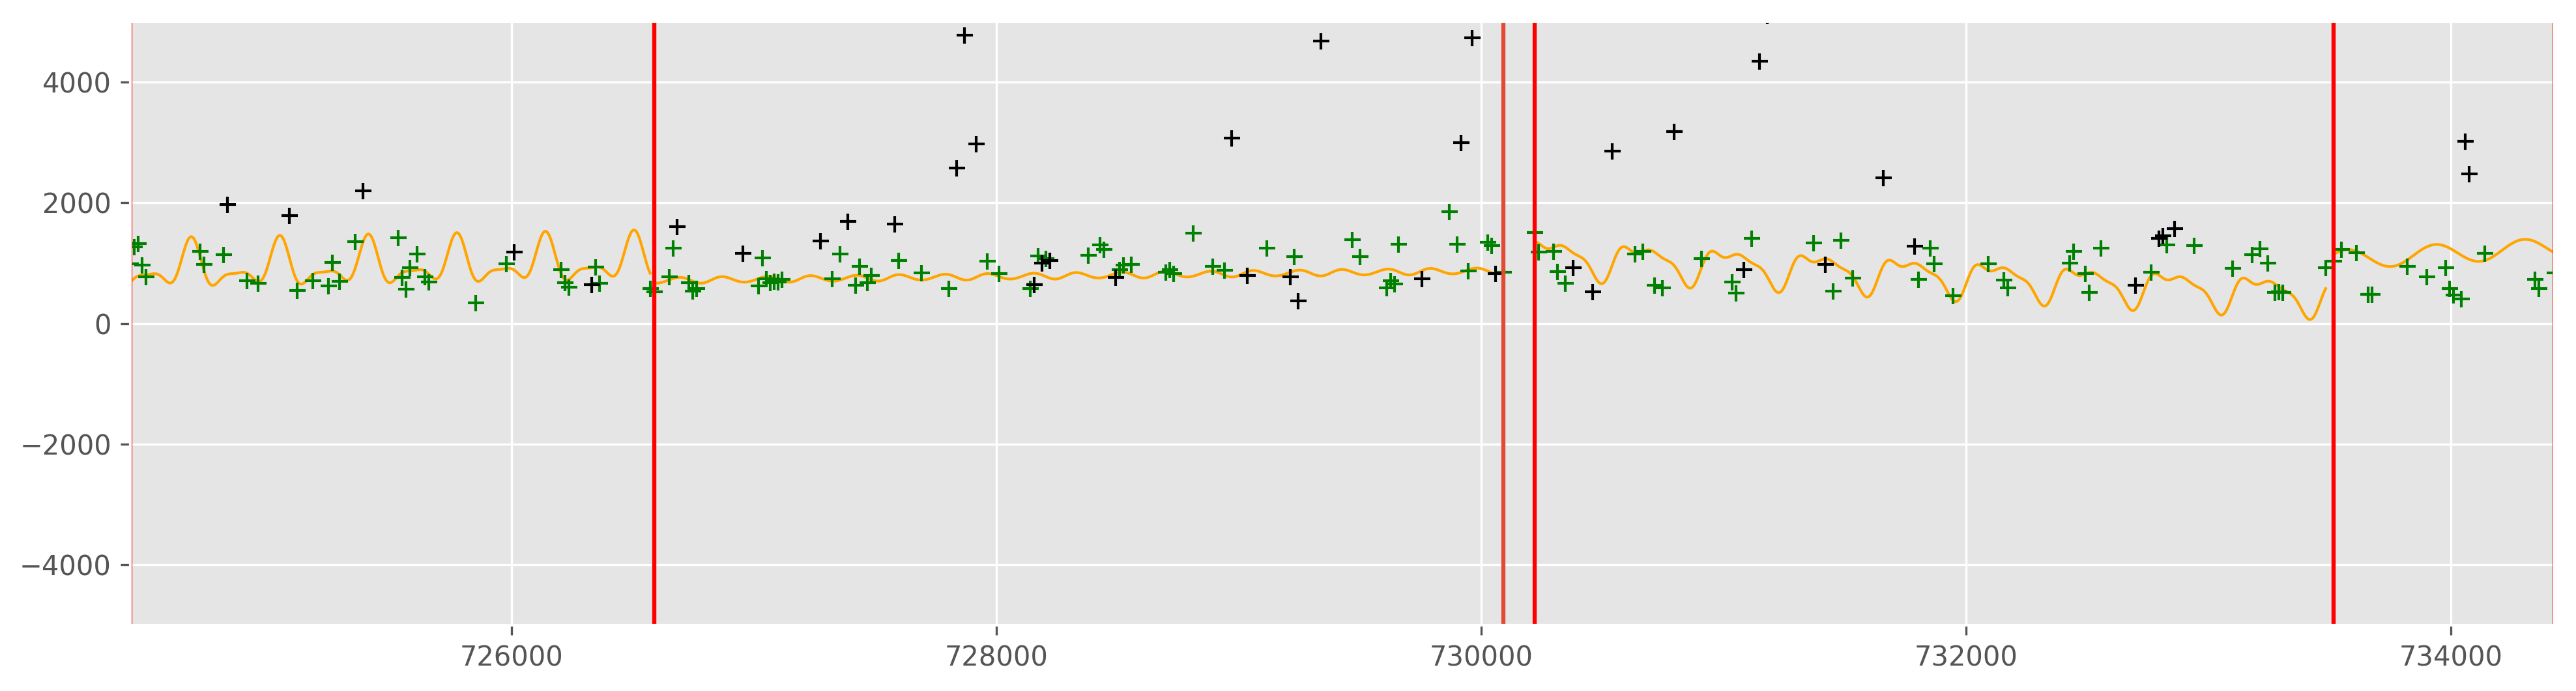

In [28]:
mask = np.array(results['processing_mask'], dtype=np.bool)
print('Start Date: {0}\nEnd Date: {1}\n'.format(datetime.fromordinal(dates[0]),
                                                datetime.fromordinal(dates[-1])))

print(mask)

predicted_values = []
prediction_dates = []
break_dates = []
start_dates = []

for num, result in enumerate(results['change_models']):
    print('Result: {}'.format(num))
    print('Start Date: {}'.format(datetime.fromordinal(result['start_day'])))
    print('End Date: {}'.format(datetime.fromordinal(result['end_day'])))
    print('Break Date: {}'.format(datetime.fromordinal(result['break_day'])))
    print('QA: {}'.format(result['curve_qa']))
    print('Norm: {}\n'.format(np.linalg.norm([result['green']['magnitude'],
                                            result['red']['magnitude'],
                                            result['nir']['magnitude'],
                                            result['swir1']['magnitude'],
                                            result['swir2']['magnitude']])))
    print('Change prob: {}'.format(result['change_probability']))
    
    days = np.arange(result['start_day'], result['end_day'] + 1)
    prediction_dates.append(days)
    break_dates.append(result['break_day'])
    start_dates.append(result['start_day'])
    
    intercept = result['green']['intercept']
    coef = result['green']['coefficients']
    
    predicted_values.append(intercept + coef[0] * days +
                            coef[1]*np.cos(days*1*2*np.pi/365.25) + coef[2]*np.sin(days*1*2*np.pi/365.25) +
                            coef[3]*np.cos(days*2*2*np.pi/365.25) + coef[4]*np.sin(days*2*2*np.pi/365.25) +
                            coef[5]*np.cos(days*3*2*np.pi/365.25) + coef[6]*np.sin(days*3*2*np.pi/365.25))
    
plt.style.use('ggplot')

fg = plt.figure(figsize=(16,9), dpi=300)
a1 = fg.add_subplot(2, 1, 1, xlim=(min(dates), max(dates)), ylim=(-5000, 5000))

# Predicted curves
for _preddate, _predvalue in zip(prediction_dates, predicted_values):
    a1.plot(_preddate, _predvalue, 'orange', linewidth=1)

a1.plot(dates[mask], greens[mask], 'g+') # Observed values
a1.plot(dates[~mask], greens[~mask], 'k+') # Observed values masked out
for b in break_dates: a1.axvline(b)
for s in start_dates: a1.axvline(s, color='r')

In [29]:
print (greens)

[ 991 1267 1321  971  774 1196  982 1144 1969  707  663 1789  549  703
  616 1009  692 1353 2202 1420  758  569  922 1148  768  688  339  984
 1187  886  672  601  645  933  663  576  529  775 1242 1606  673  539
  579 1162  616 1089  736  677  695  688  731 1369  741 1149 1691  630
  949  677  792 1644 1041  834  573 2570 4776 2978 1031  822  575  638
 1113 1004 1079 1046 1123 1301 1221  764  893  964  977  848  890  828
 1490  945  882 3072  796 1246  769 1109  371 4682 1390 1112  587  708
  651 1311  742 1847 1312 2999  871 4738 1346 1288  830  844 1503 1177
 1198  856  660  923  525 2859 1149 1189  629  592 3182 5741 1075  683
  506  887 1409 4348 5101 1337  980  536 1378  754 6010 2409 1283  729
 1244  993  464  992  717  591  997 1190  823  516 6494 1251  627  845
 1407 1450 1304 1570 1287  915 1144 1235  994  509  519  512  920 1036
 1220 1174  485  482  950  774  918  574  471  401 3013 2478 1160  734
  576  842]


In [30]:
print (greens[mask])

[ 991 1267 1321  971  774 1196  982 1144  707  663  549  703  616 1009
  692 1353 1420  758  569  922 1148  768  688  339  984  886  672  601
  933  663  576  529  775 1242  673  539  579  616 1089  736  677  695
  688  731  741 1149  630  949  677  792 1041  834  573 1031  822  575
 1113 1079 1123 1301 1221  893  964  977  848  890  828 1490  945  882
 1246 1109 1390 1112  587  708  651 1311 1847 1312  871 1346 1288  844
 1503 1177 1198  856  660 1149 1189  629  592 1075  683  506 1409 1337
  536 1378  754  729 1244  993  464  992  717  591  997 1190  823  516
 1251  845 1304 1287  915 1144 1235  994  509  519  512  920 1036 1220
 1174  485  482  950  774  918  574  471  401 1160  734  576  842]


In [31]:
print(dates)

[724428 724444 724460 724476 724492 724716 724732 724812 724828 724908
 724956 725084 725116 725180 725244 725260 725292 725356 725388 725532
 725548 725564 725580 725612 725644 725660 725852 725980 726012 726204
 726220 726236 726332 726348 726364 726572 726588 726652 726668 726684
 726732 726748 726764 726956 727020 727036 727052 727068 727084 727100
 727116 727276 727324 727356 727388 727420 727436 727468 727484 727580
 727596 727692 727804 727836 727868 727916 727964 728012 728140 728156
 728172 728188 728204 728220 728380 728428 728444 728492 728508 728524
 728556 728700 728716 728732 728812 728892 728940 728972 729036 729116
 729212 729228 729244 729340 729468 729500 729612 729628 729644 729660
 729756 729868 729900 729916 729948 729964 730028 730044 730060 730092
 730220 730236 730300 730316 730348 730380 730460 730540 730636 730668
 730716 730748 730796 730892 730908 731036 731052 731084 731116 731148
 731180 731372 731420 731452 731484 731532 731612 731660 731788 731804
 73185

In [32]:
print(dates[mask])

[724428 724444 724460 724476 724492 724716 724732 724812 724908 724956
 725116 725180 725244 725260 725292 725356 725532 725548 725564 725580
 725612 725644 725660 725852 725980 726204 726220 726236 726348 726364
 726572 726588 726652 726668 726732 726748 726764 727020 727036 727052
 727068 727084 727100 727116 727324 727356 727420 727436 727468 727484
 727596 727692 727804 727964 728012 728140 728172 728204 728380 728428
 728444 728508 728524 728556 728700 728716 728732 728812 728892 728940
 729116 729228 729468 729500 729612 729628 729644 729660 729868 729900
 729948 730028 730044 730092 730220 730236 730300 730316 730348 730636
 730668 730716 730748 730908 731036 731052 731116 731372 731452 731484
 731532 731804 731852 731868 731948 732092 732156 732172 732428 732444
 732492 732508 732556 732764 732828 732940 733100 733180 733212 733244
 733276 733292 733308 733484 733516 733548 733612 733660 733676 733820
 733900 733980 733996 734012 734044 734140 734348 734364 734428]


In [33]:
type(dates)

numpy.ndarray

In [34]:
type(dates[0])

numpy.int64

In [35]:
dates[0]

724428